## In this notebook I have done a detailed analysis on the worldwide Covid-19 outbreak and I am going to look at some interesting information and graphs for the same, in a worldwide scenario as well as in an even more granular way that is in a country specific manner. I have also built an interactive dashboard with the same datasets provided in Tableau and am attaching the link right below. Please visit the link below to see the dashboard. 
### https://public.tableau.com/profile/megha.mukherjee1881#!/vizhome/Covid-19Dashboard_15975958344210/Covid-19Dashboard?publish=yes
## Let's begin!

## Importing required libraries

In [1]:
# Importing the required libraries for visualization and prediction

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
from matplotlib.ticker import ScalarFormatter

### Importing the datasets and checking the first few values of each dataset

In [2]:
recent_data= pd.read_csv('csse_daily.csv')
recent_data.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,41069.0,Wheeler,Oregon,US,06-07-2020 19:33,44.726982,-120.028143,0,0,0,0.0,"Wheeler, Oregon, US",0.000000,NaN
1,16061.0,Lewis,Idaho,US,10-07-2020 02:34,46.233153,-116.434146,1,0,0,1.0,"Lewis, Idaho, US",26.055237,0.000000
2,45001.0,Abbeville,South Carolina,US,13-07-2020 04:43,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
3,22001.0,Acadia,Louisiana,US,13-07-2020 04:43,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
4,51001.0,Accomack,Virginia,US,13-07-2020 04:43,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
5,16001.0,Ada,Idaho,US,13-07-2020 04:43,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
6,19001.0,Adair,Iowa,US,13-07-2020 04:43,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000
7,21001.0,Adair,Kentucky,US,13-07-2020 04:43,37.104598,-85.281297,142,19,0,123.0,"Adair, Kentucky, US",739.506301,13.380282
8,29001.0,Adair,Missouri,US,13-07-2020 04:43,40.190586,-92.600782,100,0,0,100.0,"Adair, Missouri, US",394.586276,0.000000
9,40001.0,Adair,Oklahoma,US,13-07-2020 04:43,35.884942,-94.658593,137,4,0,133.0,"Adair, Oklahoma, US",617.283951,2.919708


In [3]:
us_data= pd.read_csv('07-12-2020.csv')
us_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,13-07-2020 04:43,32.3182,-86.9023,53587,1121,25783.0,26683,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117080,12.587008
1,Alaska,US,13-07-2020 04:43,61.3707,-152.4044,1479,17,615.0,847,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,13-07-2020 04:43,-14.2710,-170.1320,0,0,NaN,0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,13-07-2020 04:43,33.7298,-111.4312,122467,2237,14829.0,105401,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,13-07-2020 04:43,34.9697,-92.3731,28367,321,21591.0,6455,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532010,6.422956


In [4]:
confirmed =pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [5]:
deaths= pd.read_csv('time_series_covid19_deaths_global.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [6]:
recovered= pd.read_csv('time_series_covid19_recovered_global.csv')
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


### Separating the date columns and storing the rest of the data separately for the worldwide confirmed, deaths and recovered datasets

In [7]:
cols= confirmed.keys()
confirmed_final= confirmed.loc[:, cols[4]:cols[-1]]
deaths_final= deaths.loc[:, cols[4]:cols[-1]]
recovered_final= recovered.loc[:, cols[4]:cols[-1]]
recovered_final.head()
confirmed_final.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,07-04-2020,07-05-2020,07-06-2020,07-07-2020,07-08-2020,07-09-2020,07-10-2020,07-11-2020,07-12-2020,7/13/20
0,0,0,0,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,0,0,0,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,0,0,0,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,0,0,0,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [8]:
dates=confirmed_final.keys()
len(dates)

174

## Next the calculations for getting the total number of confirmed, deaths, recovery and active cases worldwide and country specific are done. Also calculated the worldwide recovery rate and mortality rate(CFR)

In [9]:
#Calculation for total number of confirmed, deaths, recovered, and active cases worldwide and country specific
#and recovery and mortality rate(CFR)

global_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = []
for i in dates:
    confirmed_sum = confirmed_final[i].sum()
    death_sum = deaths_final[i].sum()
    recovered_sum = recovered_final[i].sum()
    
    global_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)


    us_confirmed_cases= []
    brazil_confirmed_cases= []
    russia_confirmed_cases= []
    india_confirmed_cases= [] 
    spain_confirmed_cases= [] 
    italy_confirmed_cases= [] 
    uk_confirmed_cases= [] 
    france_confirmed_cases= [] 
    germany_confirmed_cases= []
    iran_confirmed_cases= []
    

for i in dates:
    us_confirmed_cases.append(confirmed[confirmed['Country/Region']=='US'][i].sum())
    brazil_confirmed_cases.append(confirmed[confirmed['Country/Region']=='Brazil'][i].sum())
    russia_confirmed_cases.append(confirmed[confirmed['Country/Region']=='Russia'][i].sum())
    india_confirmed_cases.append(confirmed[confirmed['Country/Region']=='India'][i].sum())
    spain_confirmed_cases.append(confirmed[confirmed['Country/Region']=='Spain'][i].sum())
    italy_confirmed_cases.append(confirmed[confirmed['Country/Region']=='Italy'][i].sum())
    uk_confirmed_cases.append(confirmed[confirmed['Country/Region']=='United Kingdom'][i].sum())
    france_confirmed_cases.append(confirmed[confirmed['Country/Region']=='France'][i].sum())
    germany_confirmed_cases.append(confirmed[confirmed['Country/Region']=='Germany'][i].sum())
    iran_confirmed_cases.append(confirmed[confirmed['Country/Region']=='Iran'][i].sum())
    
# brazil_confirmed_cases



In [10]:
us_deaths= [] 
uk_deaths= []
italy_deaths= [] 
brazil_deaths= [] 
spain_deaths= [] 
france_deaths= [] 
mexico_deaths= [] 
belgium_deaths= []
iran_deaths= []
germany_deaths= []

for i in dates:
    us_deaths.append(deaths[deaths['Country/Region']=='US'][i].sum())
    uk_deaths.append(deaths[deaths['Country/Region']=='United Kingdom'][i].sum())
    italy_deaths.append(deaths[deaths['Country/Region']=='Italy'][i].sum())
    brazil_deaths.append(deaths[deaths['Country/Region']=='Brazil'][i].sum())
    spain_deaths.append(deaths[deaths['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths[deaths['Country/Region']=='France'][i].sum())
    mexico_deaths.append(deaths[deaths['Country/Region']=='Mexico'][i].sum())
    belgium_deaths.append(deaths[deaths['Country/Region']=='Belgium'][i].sum())
    iran_deaths.append(deaths[deaths['Country/Region']=='Iran'][i].sum())
    germany_deaths.append(deaths[deaths['Country/Region']=='Germany'][i].sum())
    



In [11]:
us_recoveries = [] 
brazil_recoveries = []
russia_recoveries = [] 
germany_recoveries = [] 
india_recoveries = [] 
spain_recoveries = [] 
italy_recoveries = [] 
iran_recoveries = [] 
china_recoveries = [] 
turkey_recoveries = [] 

for i in dates:
    us_recoveries.append(recovered[recovered['Country/Region']=='US'][i].sum())
    brazil_recoveries.append(recovered[recovered['Country/Region']=='Brazil'][i].sum())
    russia_recoveries.append(recovered[recovered['Country/Region']=='Russia'][i].sum())
    germany_recoveries.append(recovered[recovered['Country/Region']=='Germany'][i].sum())
    india_recoveries.append(recovered[recovered['Country/Region']=='India'][i].sum())
    spain_recoveries.append(recovered[recovered['Country/Region']=='Spain'][i].sum())
    italy_recoveries.append(recovered[recovered['Country/Region']=='Italy'][i].sum())
    iran_recoveries.append(recovered[recovered['Country/Region']=='Iran'][i].sum())
    china_recoveries.append(recovered[recovered['Country/Region']=='China'][i].sum())
    turkey_recoveries.append(recovered[recovered['Country/Region']=='Turkey'][i].sum())

### Now the increase in the cases(confirmed, deaths, recovery) are calculated for both globally and for specific countries

In [12]:
#Calculation for daily increase of confirmed, deaths, recovered, and active cases worldwide

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])       
    return d 

#B=np.dot(global_cases, global_cases.T)
#np.exp(np.dot(d,B))
# increase= np.vectorize(daily_increase)
# globcase= global_cases.astype(np.int32)
#case1= np.vectorize(np.(globcase)

daily_increase_worldwide= daily_increase(global_cases)
daily_increase_death_worldwide= daily_increase(total_deaths)
daily_increased_recoveries_worldwide= daily_increase(total_recovered)
daily_increased_active_worldwide= daily_increase(total_active)

In [13]:
us_daily_increase = daily_increase(us_confirmed_cases)
brazil_daily_increase = daily_increase(brazil_confirmed_cases)
russia_daily_increase = daily_increase(russia_confirmed_cases)
india_daily_increase = daily_increase(india_confirmed_cases)
spain_daily_increase = daily_increase(spain_confirmed_cases)
italy_daily_increase = daily_increase(italy_confirmed_cases)
#us_daily_increase = daily_increase(us_confirmed_cases)


In [14]:
us_daily_death_increase = daily_increase(us_deaths)
uk_daily_death_increase = daily_increase(uk_deaths)
italy_daily_death_increase = daily_increase(italy_deaths)
brazil_daily_death_increase = daily_increase(brazil_deaths)
spain_daily_death_increase = daily_increase(spain_deaths)
france_daily_death_increase = daily_increase(france_deaths)
# italy_daily_increase = daily_increase(italy_confirmed_cases)

In [15]:
us_daily_recovery_increase = daily_increase(us_recoveries)
brazil_daily_recovery_increase = daily_increase(brazil_recoveries)
russia_daily_recovery_increase = daily_increase(russia_recoveries)
germany_daily_recovery_increase = daily_increase(germany_recoveries)
india_daily_recovery_increase = daily_increase(india_recoveries)
spain_daily_recovery_increase = daily_increase(spain_recoveries)
italy_daily_recovery_increase = daily_increase(italy_recoveries)



In [16]:
total_days = np.array([i for i in range(len(dates))]).reshape(-1, 1)
global_cases = np.array(global_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = np.array(future_forcast[:-10])
#len(global_cases)
#len(adjusted_dates)

In [17]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

## Plotting the Confirmed, Death, Recovery, Active cases, Recovery rate and Mortality rate worldwide. Also plotting the Log graphs of the Confirmed, Death, Recovered and Active cases.

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000.]),
 <a list of 9 Text major ticklabel objects>)

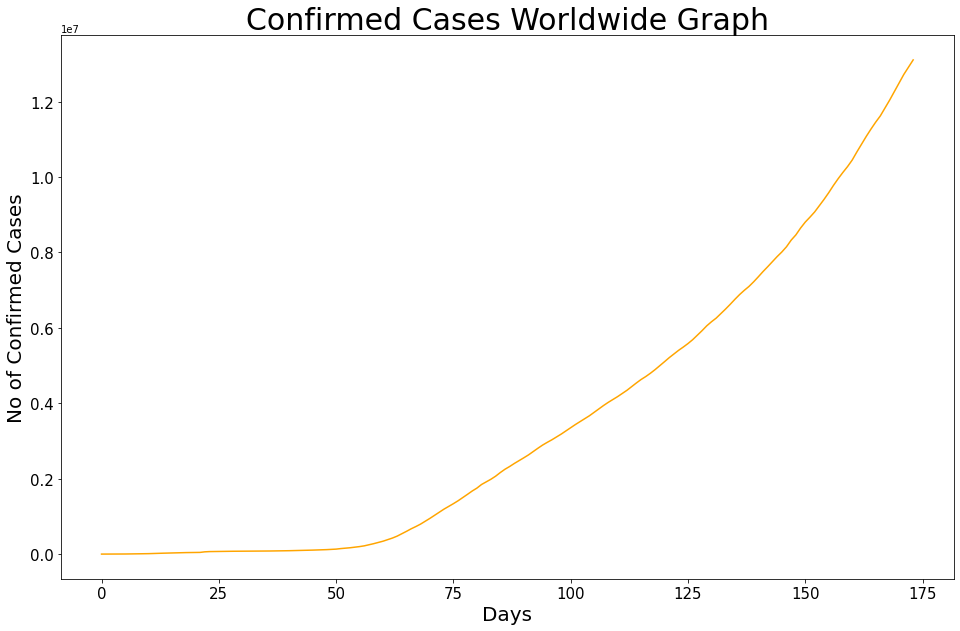

In [18]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, global_cases, color= 'orange')
plt.title('Confirmed Cases Worldwide Graph', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)



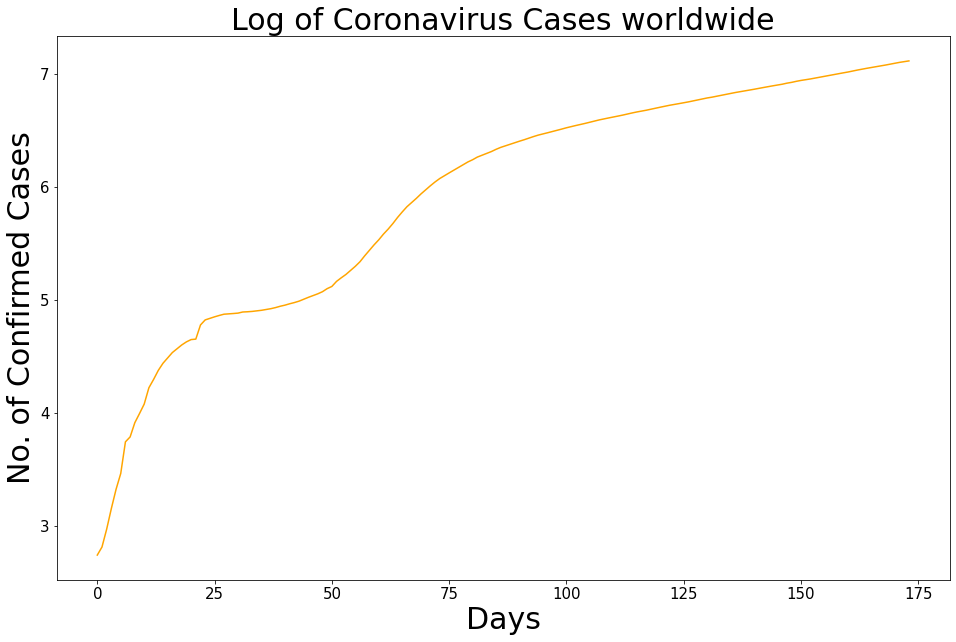

In [19]:
# log of confirmed case

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(global_cases), color='orange')
plt.title('Log of Coronavirus Cases worldwide', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 <a list of 9 Text major ticklabel objects>)

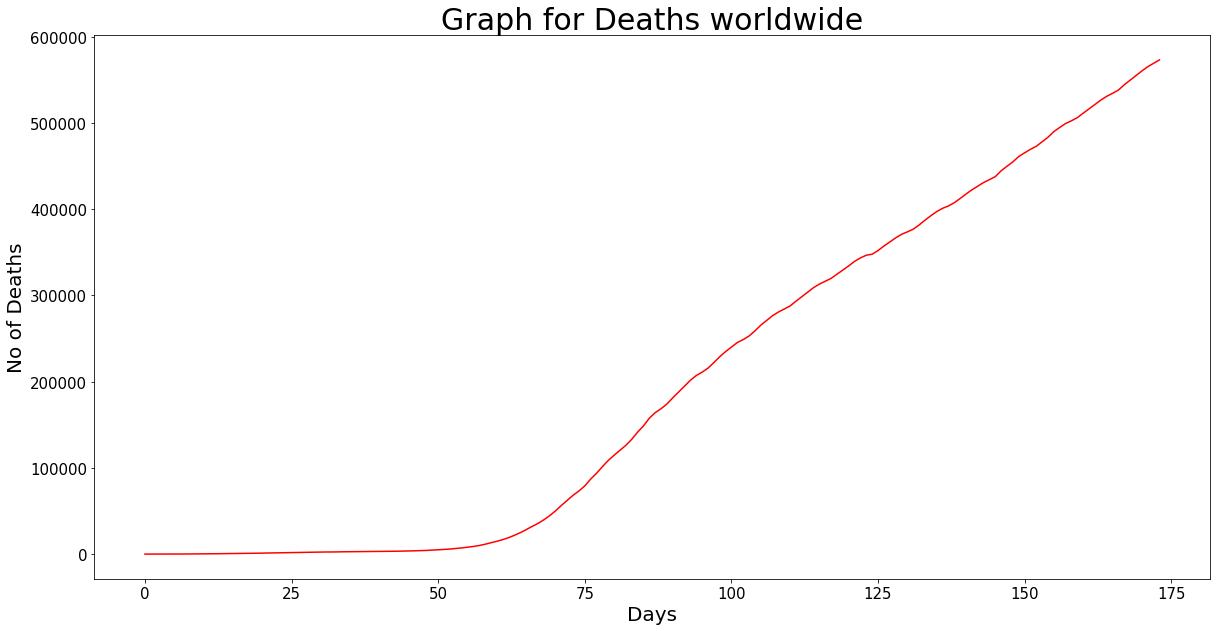

In [20]:
plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, total_deaths, color= 'red')
plt.title('Graph for Deaths worldwide', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Deaths', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

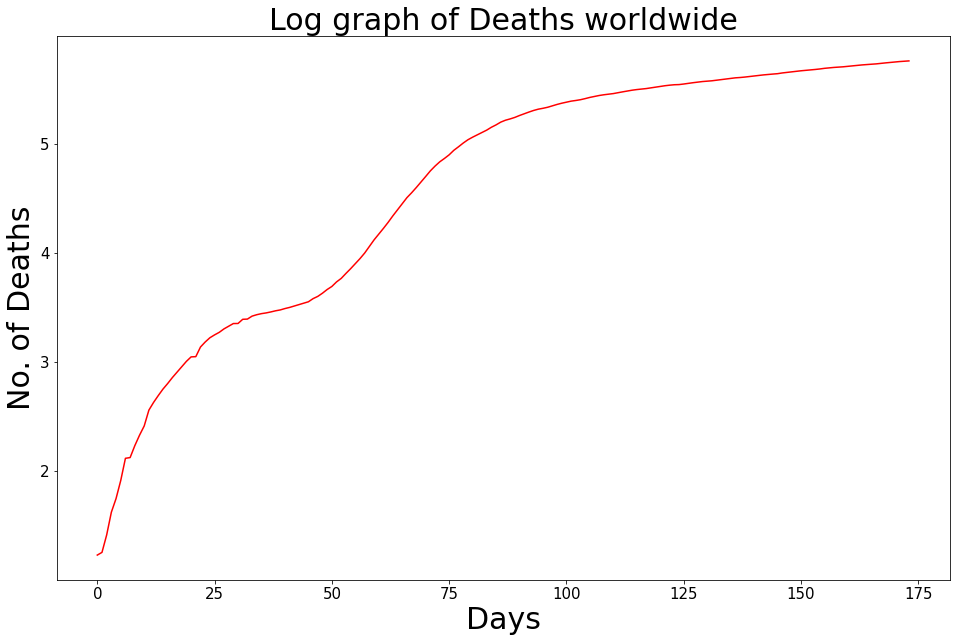

In [21]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths), color='red')
plt.title('Log graph of Deaths worldwide', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text major ticklabel objects>)

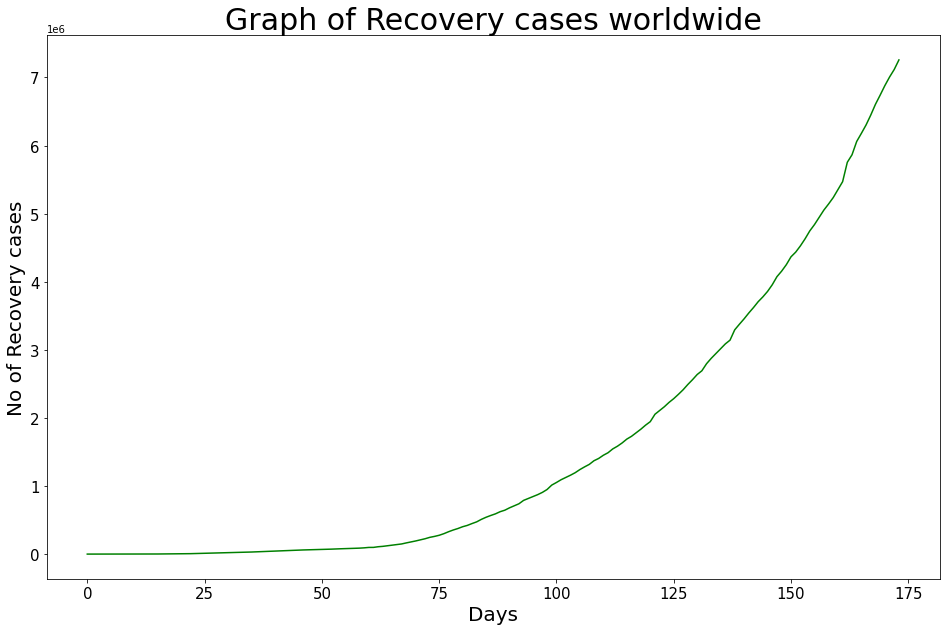

In [22]:
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, total_recovered, color= 'green')
plt.title('Graph of Recovery cases worldwide', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Recovery cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

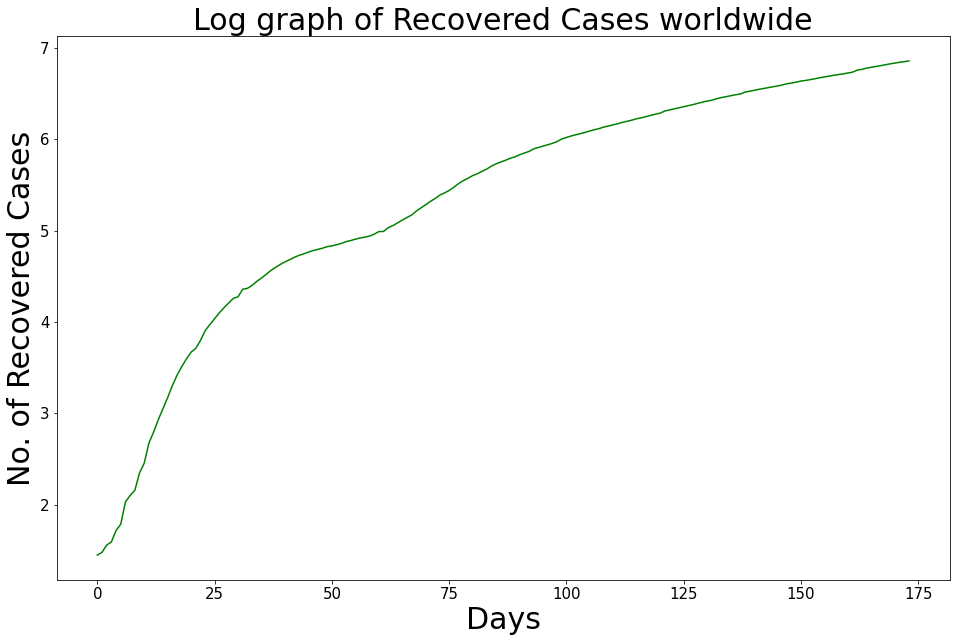

In [23]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_recovered), color='green')
plt.title('Log graph of Recovered Cases worldwide', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovered Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]),
 <a list of 8 Text major ticklabel objects>)

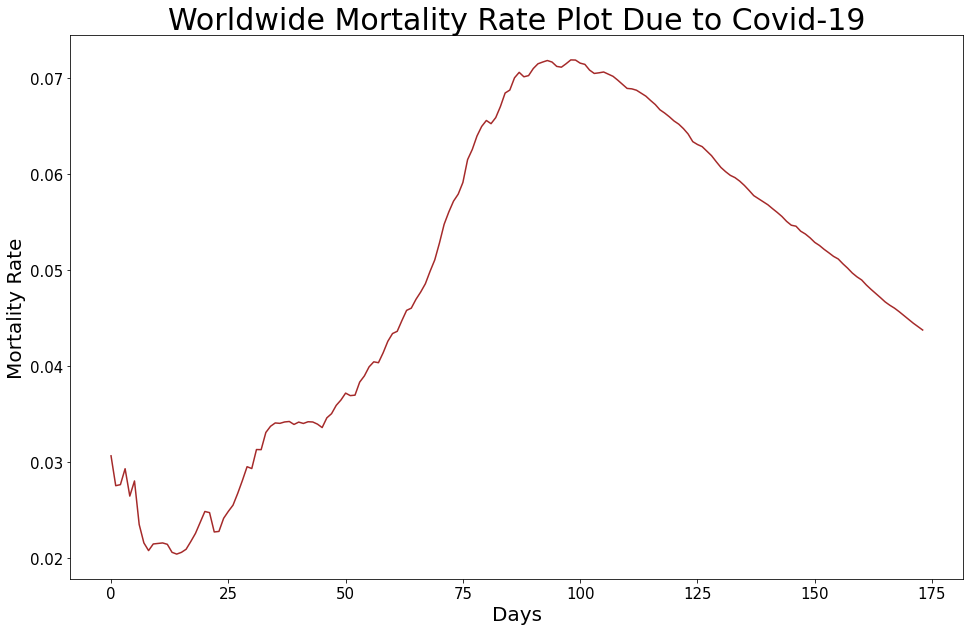

In [24]:
#Plotting the worldwide mortality rate

plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, mortality_rate, color= 'brown')
plt.title('Worldwide Mortality Rate Plot Due to Covid-19', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('Mortality Rate', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <a list of 8 Text major ticklabel objects>)

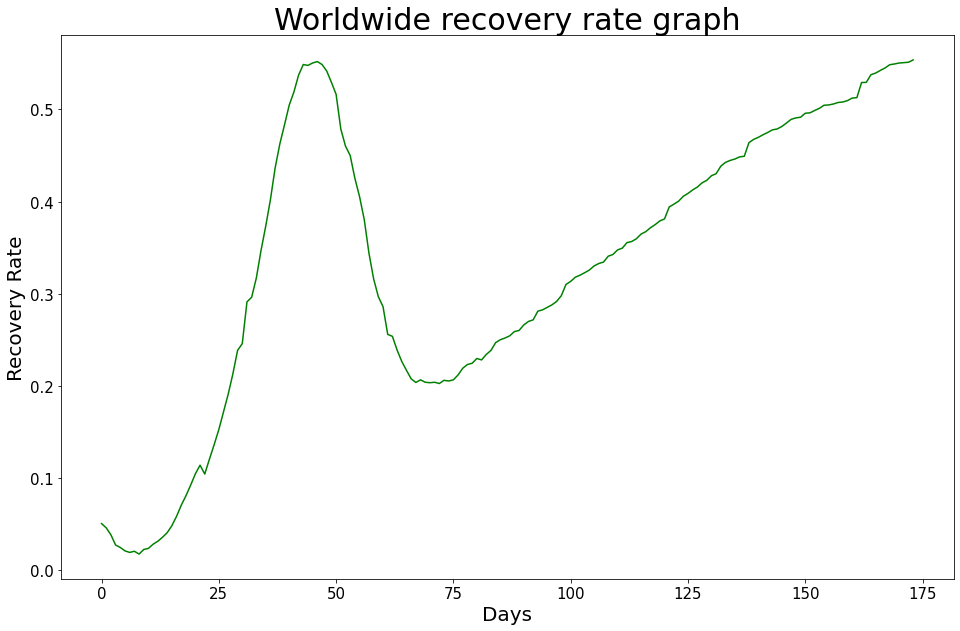

In [25]:
#Plotting the worldwide recovery rate

plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, recovery_rate, color= 'green')
plt.title('Worldwide recovery rate graph', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('Recovery Rate', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

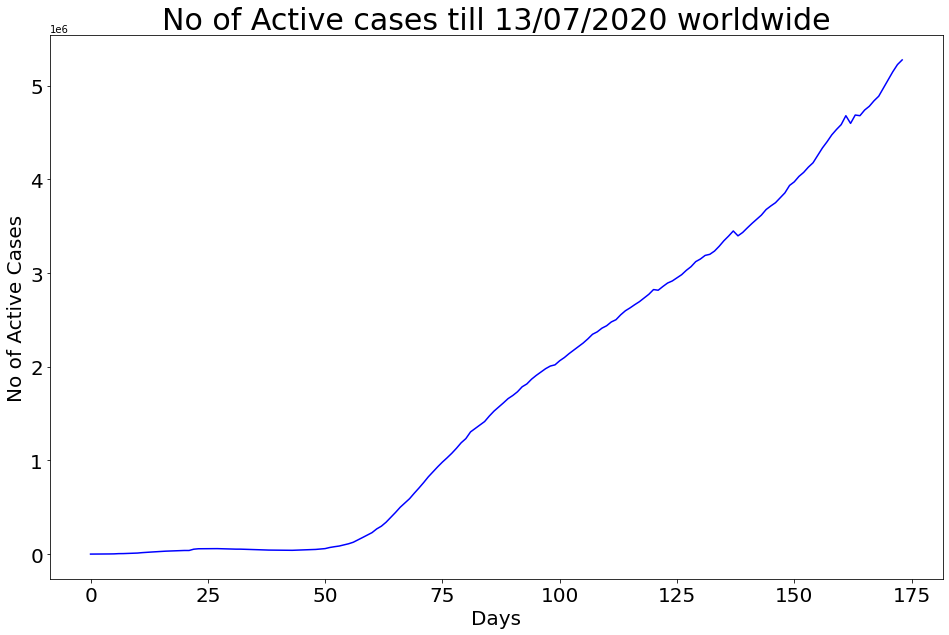

In [26]:
#Plotting the number of active cases

plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, total_active, color= 'blue')
plt.title('No of Active cases till 13/07/2020 worldwide', size=30)
plt.xlabel('Days', size=20)
plt.ylabel('No of Active Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

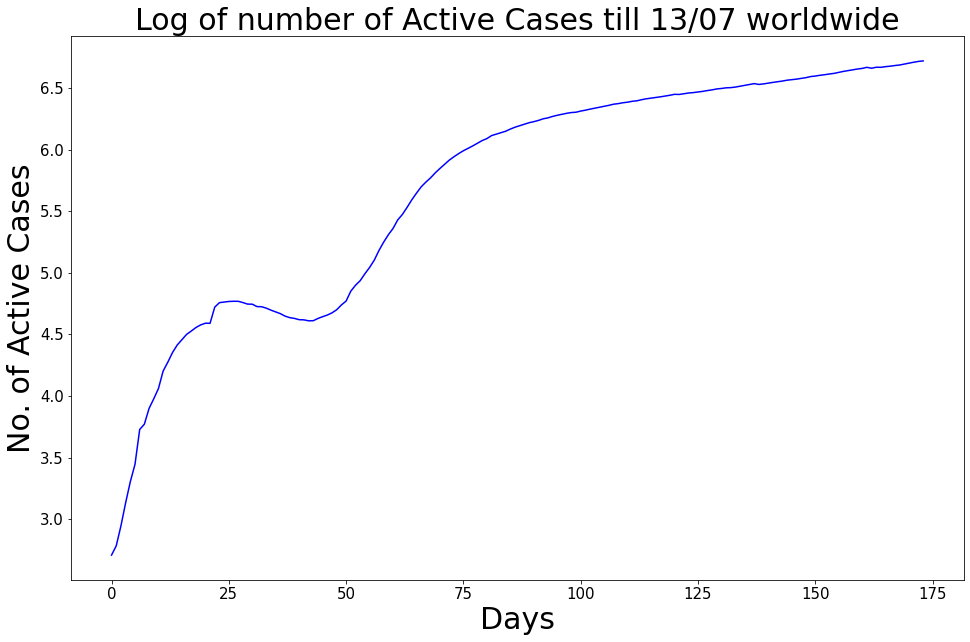

In [27]:
#log of active cases

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_active), color='blue')
plt.title('Log of number of Active Cases till 13/07 worldwide', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Active Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Plotting the daily increase in Confirmed, Death, Recovery cases worldwide

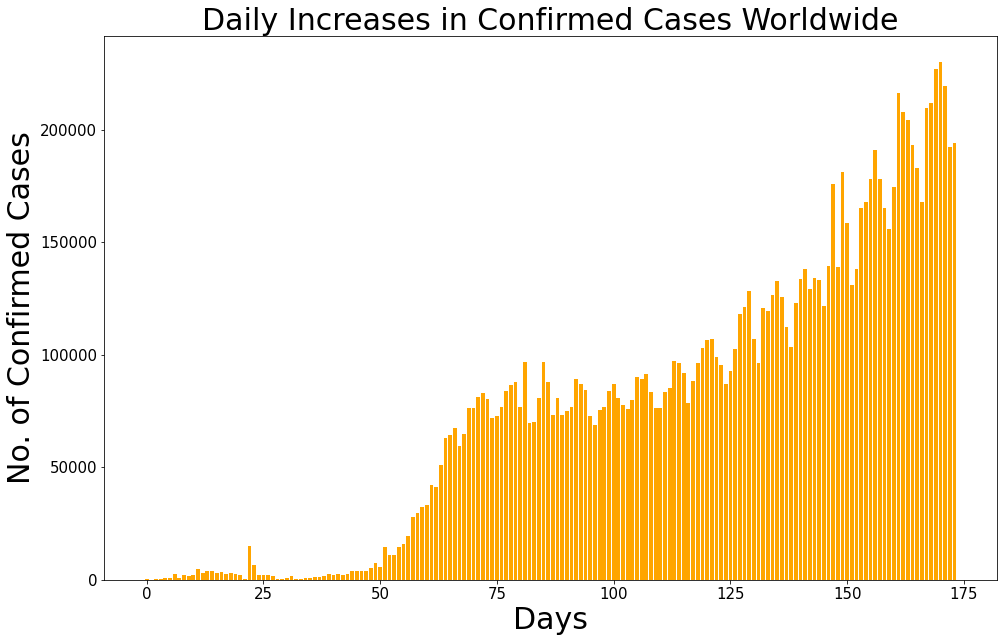

In [28]:
#Plotting daily increase in confirmed cases

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_increase_worldwide, color='orange')
plt.title('Daily Increases in Confirmed Cases Worldwide', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


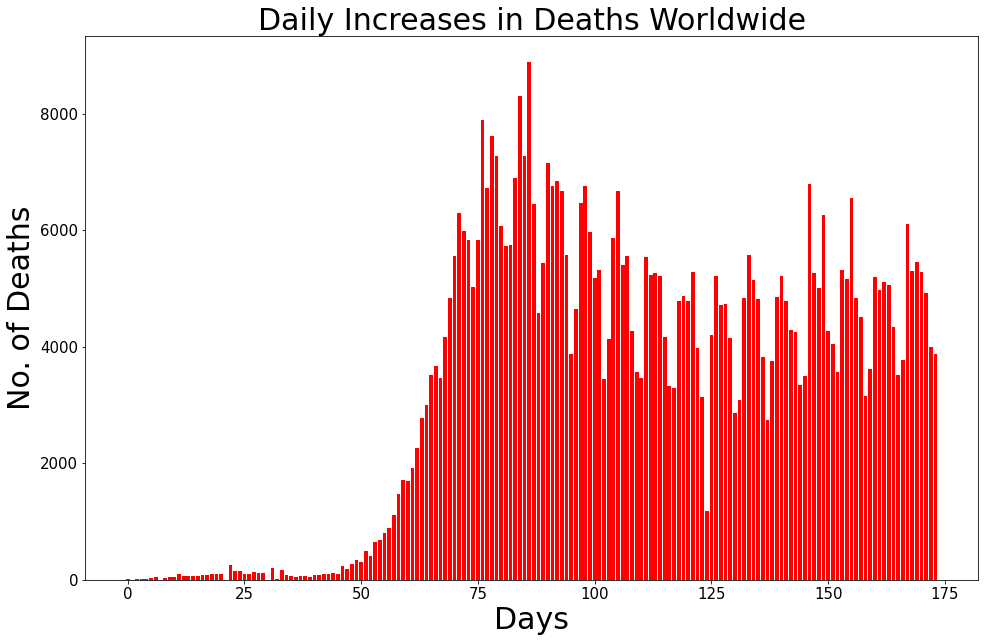

In [29]:
#Plotting daily increase in death cases

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates,daily_increase_death_worldwide, color='red')
plt.title('Daily Increases in Deaths Worldwide', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

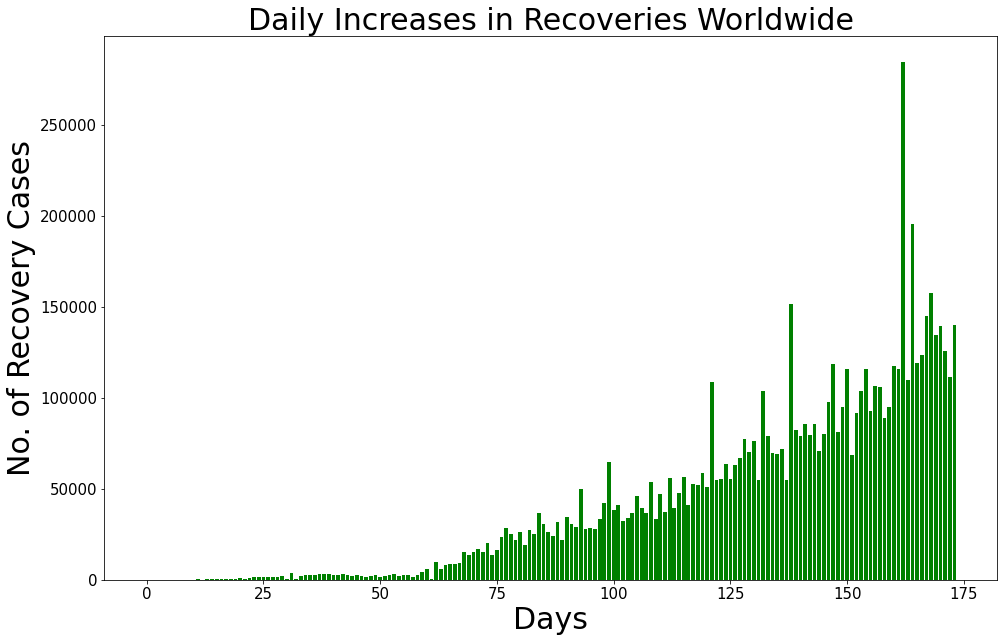

In [30]:
#Plotting daily increase in recovery worldwide

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_increased_recoveries_worldwide, color='green')
plt.title('Daily Increases in Recoveries Worldwide', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Now I have found the top 10 countries having the most number of confirmed cases and have created charts to view the trends and daily increament in confirmed cases in those countries over time. For that the dataset for worldwide confirmed, death and recovery cases have been pivoted.

In [31]:
confirmed_pivoted = pd.read_csv('pivoted_confirmed.csv')
confirmed_pivoted.rename(columns={'Province/State':'State','Country/Region':'Country'}, inplace=True)

In [32]:
confirmed_pivoted.head(10)

,State,Country,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,02-01-2020,0
1,NaN,Albania,41.15330,20.168300,02-01-2020,0
2,NaN,Algeria,28.03390,1.659600,02-01-2020,0
3,NaN,Andorra,42.50630,1.521800,02-01-2020,0
4,NaN,Angola,-11.20270,17.873900,02-01-2020,0
5,NaN,Antigua and Barbuda,17.06080,-61.796400,02-01-2020,0
6,NaN,Argentina,-38.41610,-63.616700,02-01-2020,0
7,NaN,Armenia,40.06910,45.038200,02-01-2020,0
8,Australian Capital Territory,Australia,-35.47350,149.012400,02-01-2020,0
9,New South Wales,Australia,-33.86880,151.209300,02-01-2020,4


In [33]:
confirmed_pivoted.isnull().sum().to_frame('nulls')

,nulls
State,32190
Country,0
Lat,0
Long,0
Date,0
Confirmed,0


In [34]:
df_confirmed= confirmed_pivoted.groupby('Country').agg({'Confirmed':'sum'})
df_confirmed

,Confirmed
Country,
Afghanistan,1438348
Albania,137293
Algeria,843255
Andorra,82020
Angola,12039
...,...
West Bank and Gaza,108929
Western Sahara,761
Yemen,44561


In [35]:
sorted_df_confirmed= df_confirmed.sort_values('Confirmed', ascending= False)
sorted_df_confirmed

,Confirmed
Country,
US,170145797
Brazil,59007033
Russia,34507842
India,24225853
Spain,23691881
...,...
Saint Kitts and Nevis,1534
Holy See,1188
MS Zaandam,944


In [36]:
top_confirmed= sorted_df_confirmed.head(10)
top_confirmed
Countries= list(top_confirmed.index)

## Now we will have the look at the top 10 countries in terms of confirmed cases. And will see the increasing trend of confirmed cases over time and daily increase for the top countries with the most number of confirmed cases.

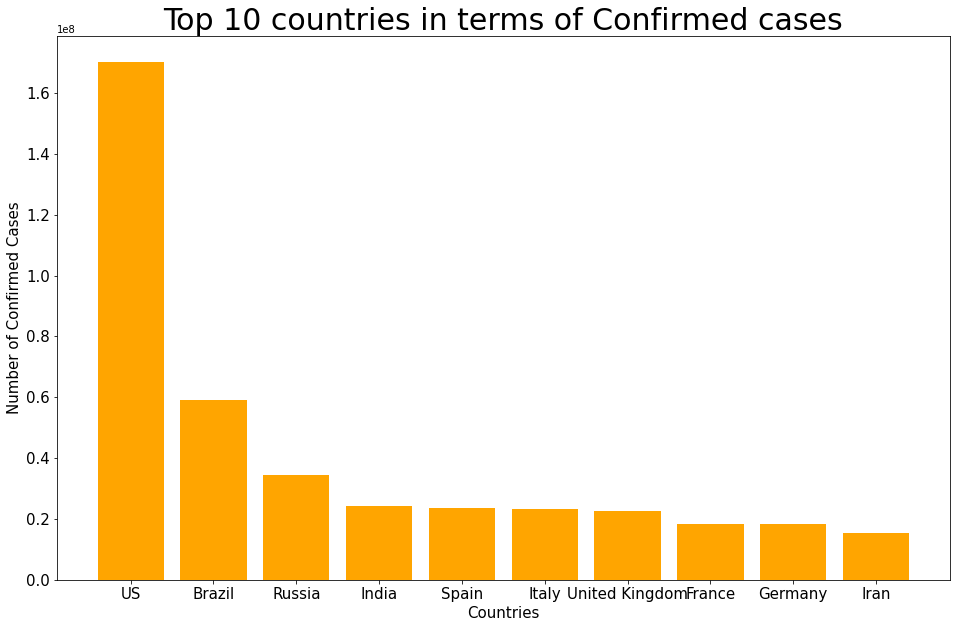

In [37]:
#getting barchart for top 10 countries having most number of confirmed cases

plt.figure(figsize=(16, 10))
plt.bar(Countries, top_confirmed.Confirmed, color='Orange')
plt.title('Top 10 countries in terms of Confirmed cases', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Confirmed Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Plotting the graphs for confirmed cases and daily increase in confirmed cases for the top 6 countries having most number of confirmed cases

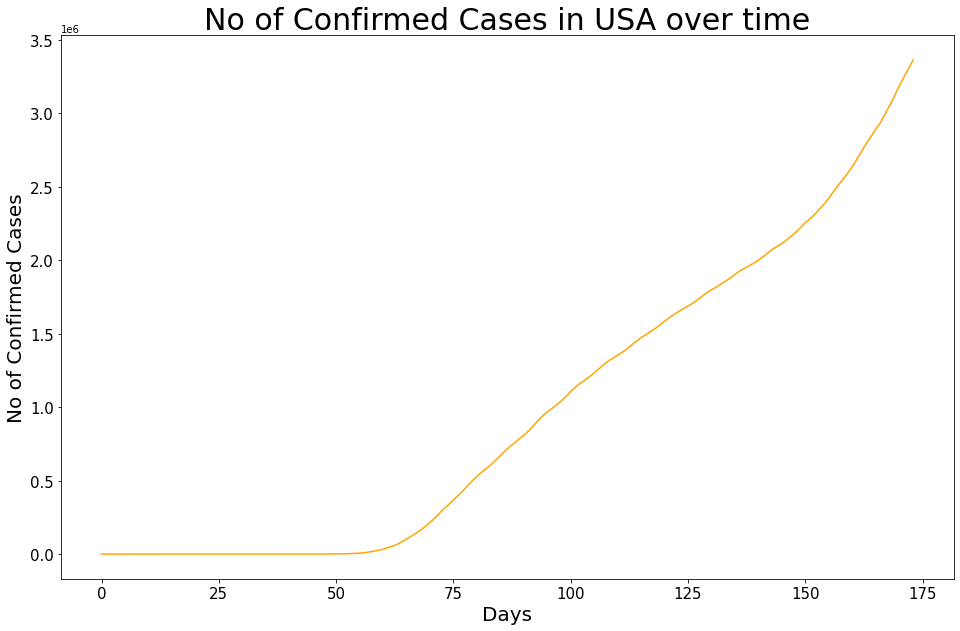

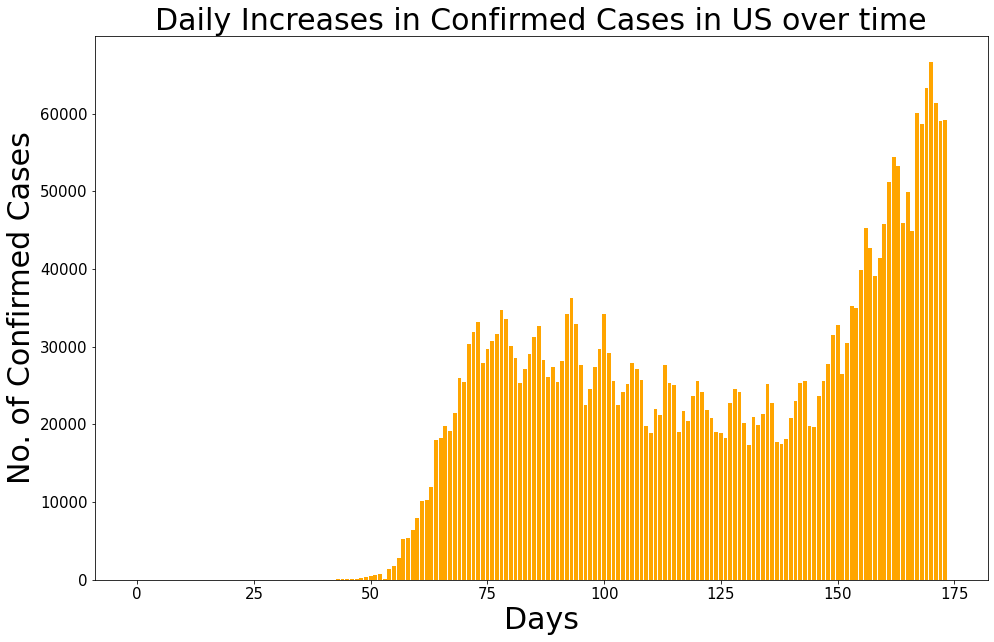

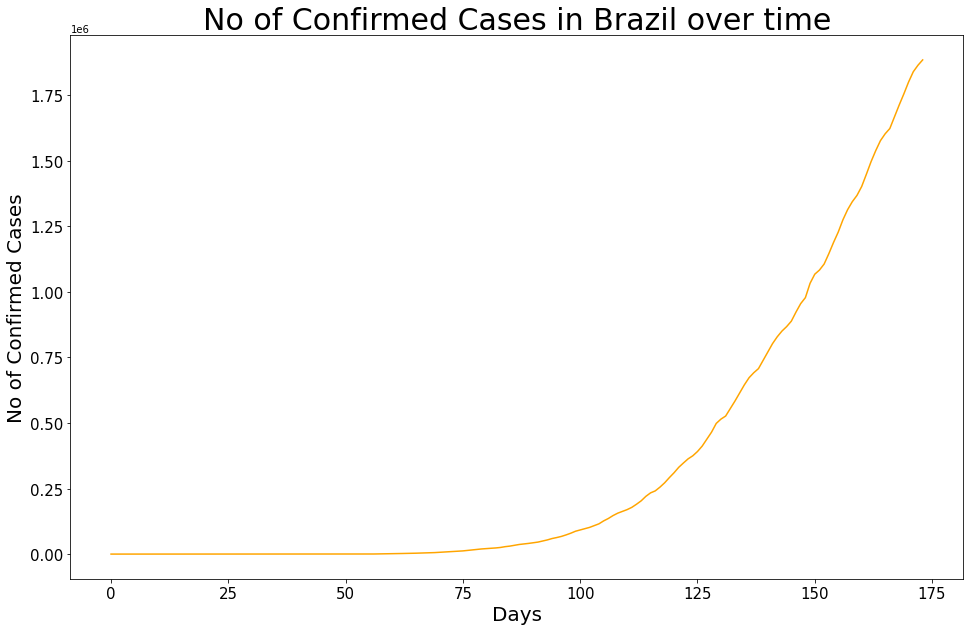

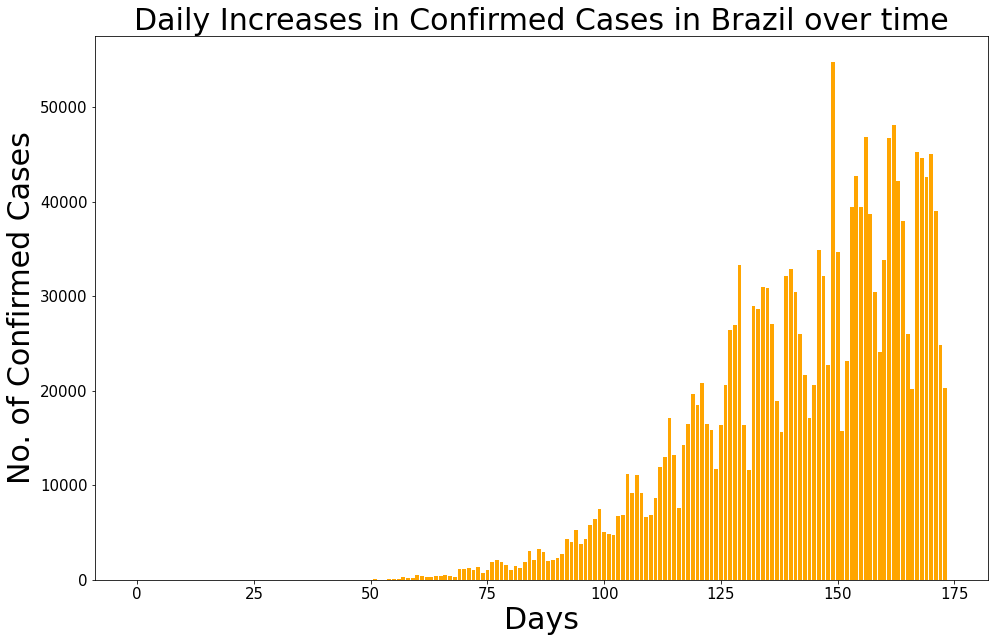

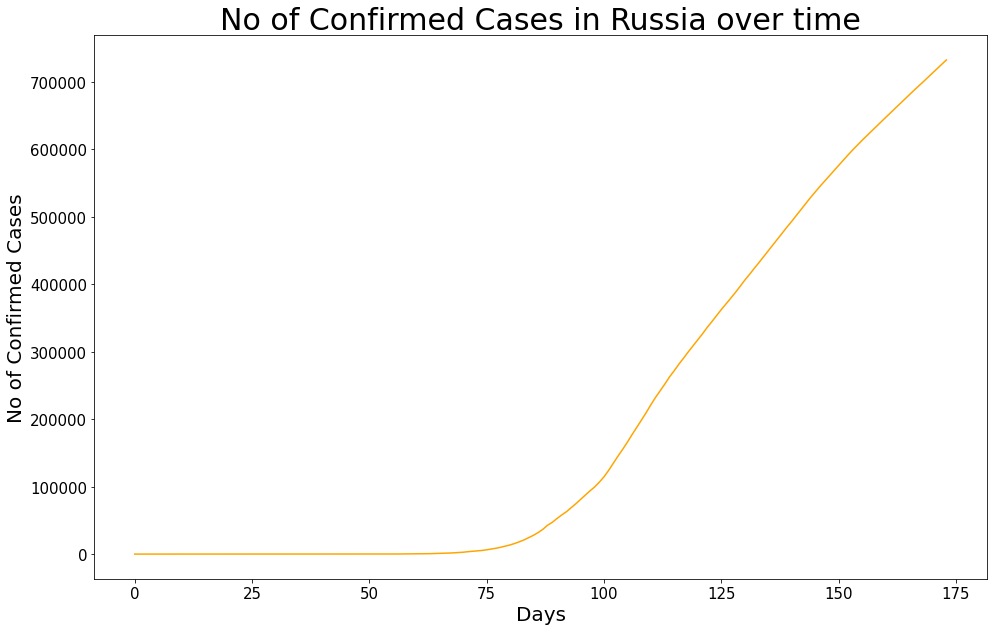

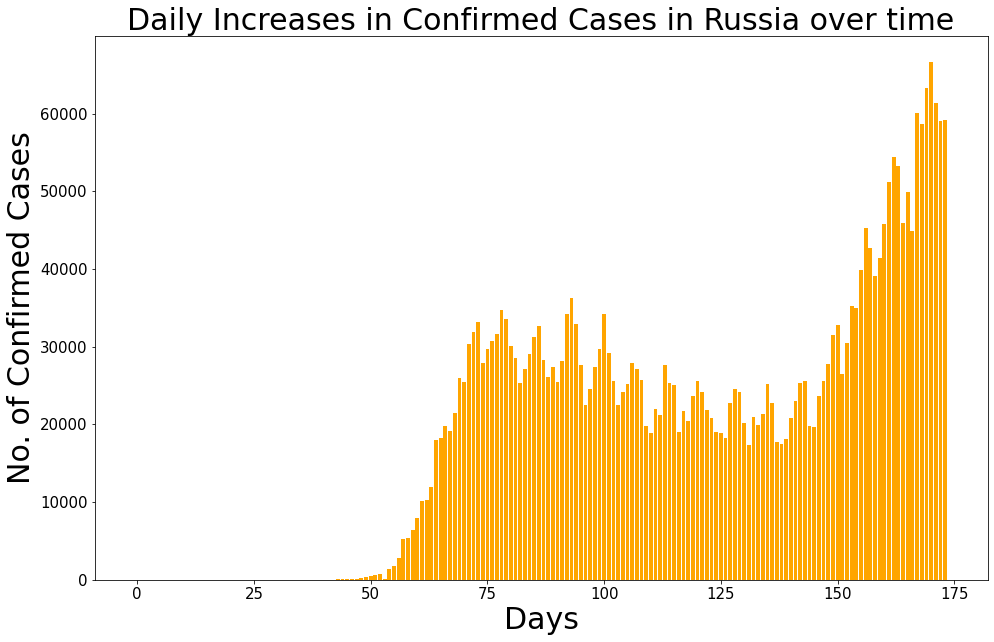

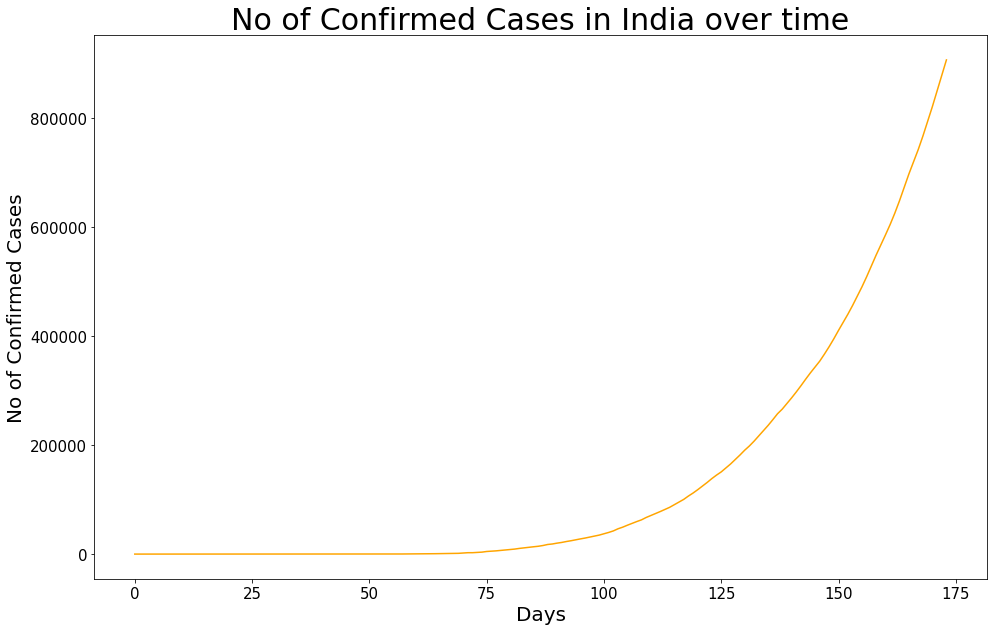

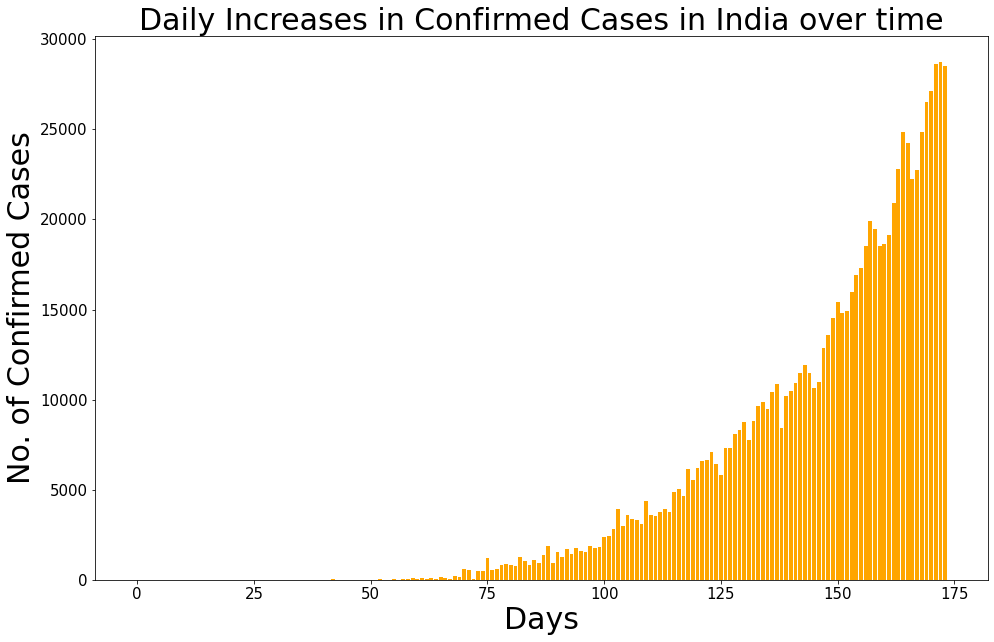

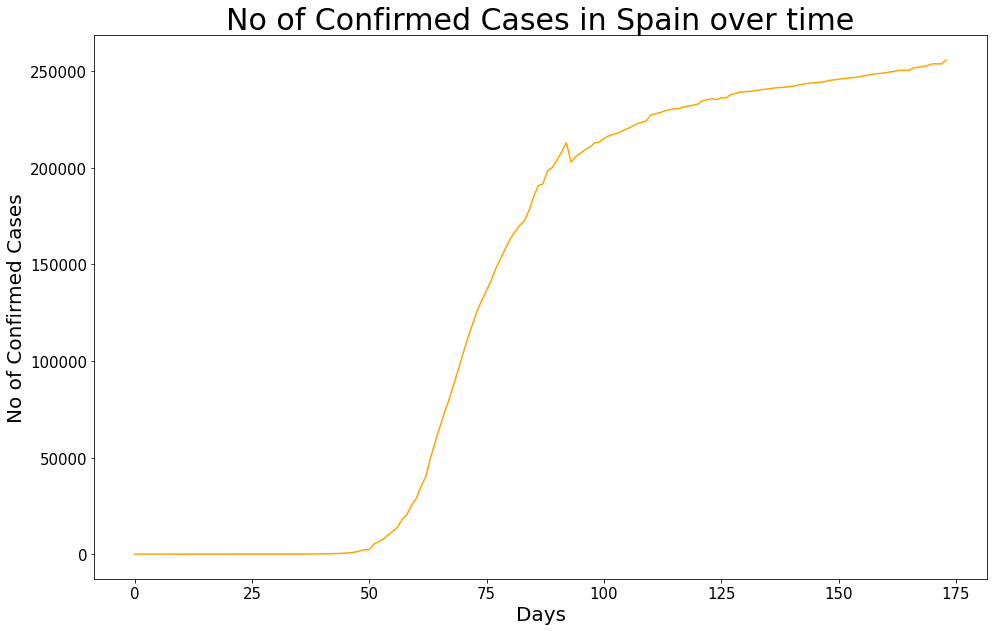

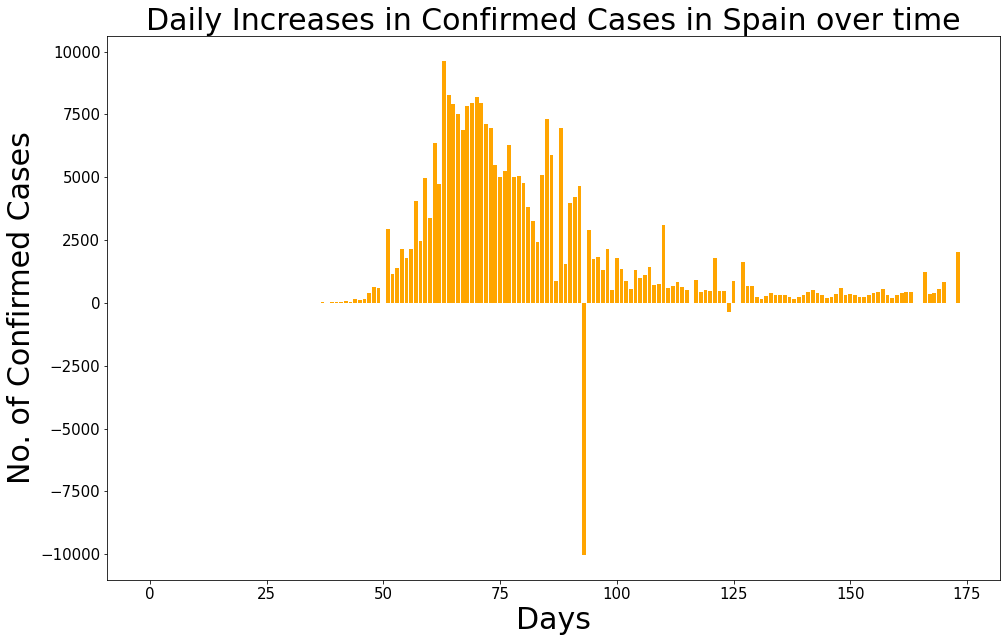

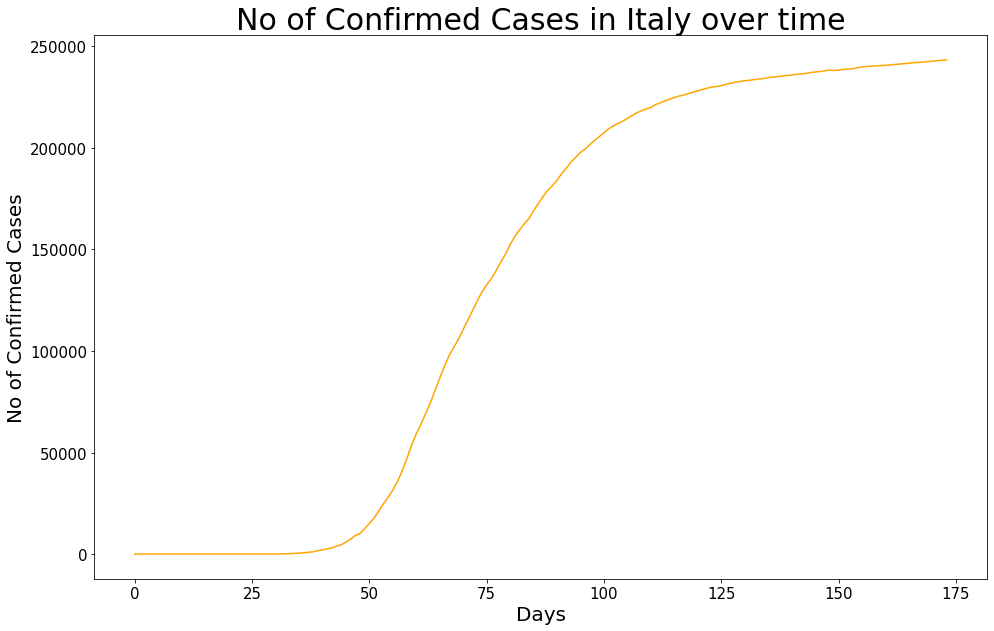

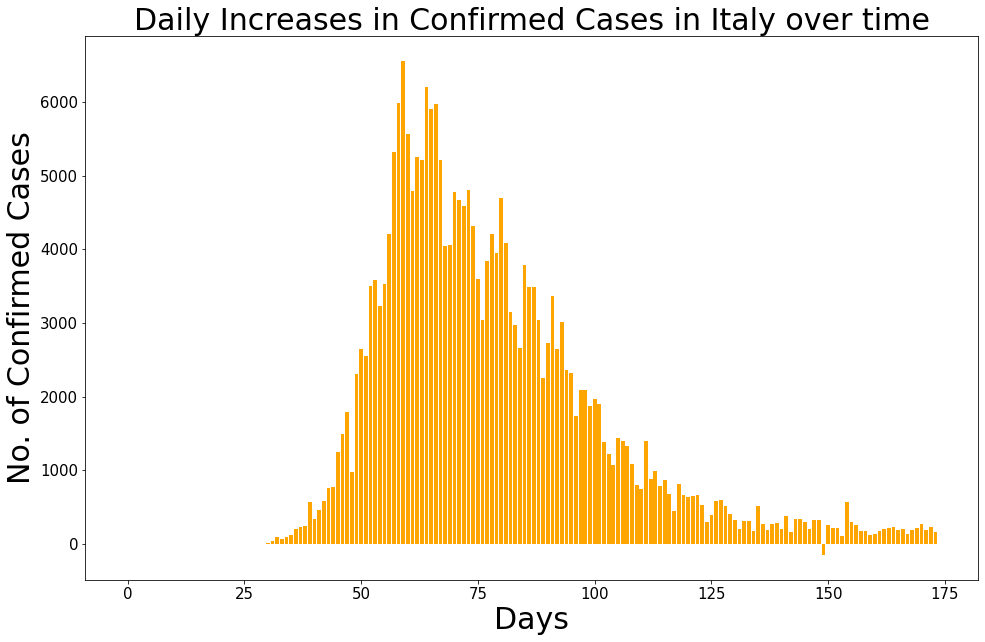

In [38]:
#USA Graphs
us_confirmed_cases
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, us_confirmed_cases, color= 'orange')
plt.title('No of Confirmed Cases in USA over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, us_daily_increase, color='orange')
plt.title('Daily Increases in Confirmed Cases in US over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Brazil Graphs
brazil_confirmed_cases
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, brazil_confirmed_cases, color= 'orange')
plt.title('No of Confirmed Cases in Brazil over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, brazil_daily_increase, color='orange')
plt.title('Daily Increases in Confirmed Cases in Brazil over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Russia Graphs
russia_confirmed_cases
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, russia_confirmed_cases, color= 'orange')
plt.title('No of Confirmed Cases in Russia over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, us_daily_increase, color='orange')
plt.title('Daily Increases in Confirmed Cases in Russia over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#India Graphs
india_confirmed_cases
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, india_confirmed_cases, color= 'orange')
plt.title('No of Confirmed Cases in India over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, india_daily_increase, color='orange')
plt.title('Daily Increases in Confirmed Cases in India over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Spain garphs
spain_confirmed_cases
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, spain_confirmed_cases, color= 'orange')
plt.title('No of Confirmed Cases in Spain over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, spain_daily_increase, color='orange')
plt.title('Daily Increases in Confirmed Cases in Spain over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Italy graphs
italy_confirmed_cases
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,10))
plt.plot(adjusted_dates, italy_confirmed_cases, color= 'orange')
plt.title('No of Confirmed Cases in Italy over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Confirmed Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, italy_daily_increase, color='orange')
plt.title('Daily Increases in Confirmed Cases in Italy over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Next we will see a graphical comparison of the top countries with most number of confirmed cases 


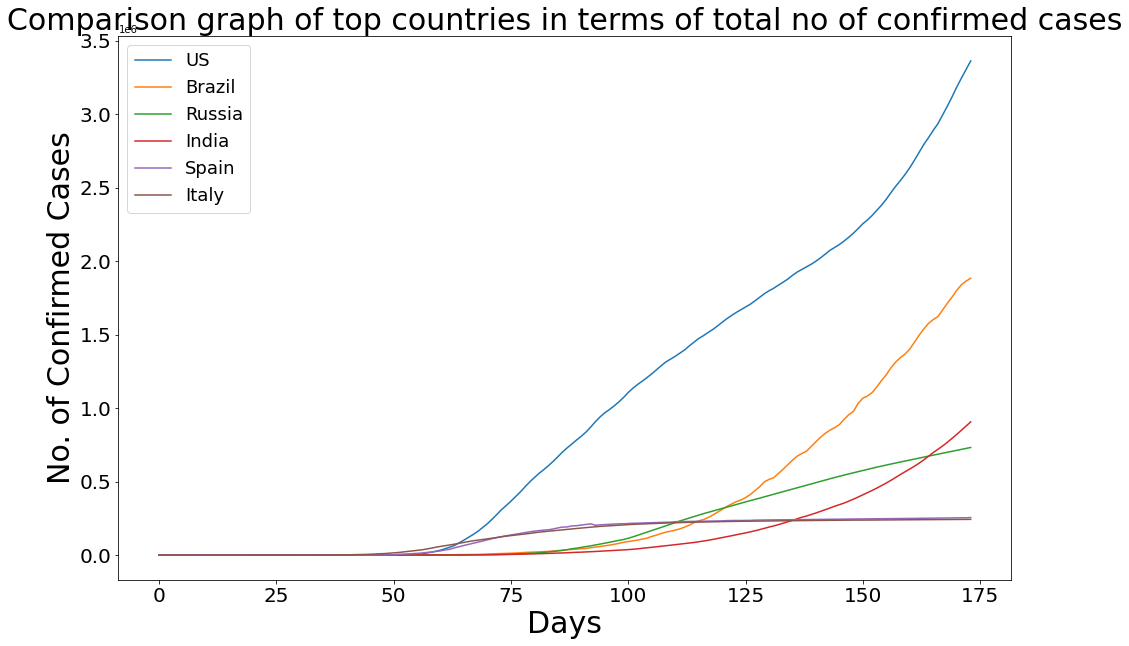

In [39]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, us_confirmed_cases)
plt.plot(adjusted_dates, brazil_confirmed_cases)
plt.plot(adjusted_dates, russia_confirmed_cases)
plt.plot(adjusted_dates, india_confirmed_cases)
plt.plot(adjusted_dates, spain_confirmed_cases)
plt.plot(adjusted_dates, italy_confirmed_cases)

plt.title('Comparison graph of top countries in terms of total no of confirmed cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Confirmed Cases', size=30)
plt.legend(['US', 'Brazil', 'Russia', 'India', 'Spain', 'Italy','China'], prop={'size': 18})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [40]:
pivoted_deaths= pd.read_csv('pivoted_deaths.csv')

In [41]:
df_deaths= pivoted_deaths.groupby('Country').agg({'Deaths':'sum'})
df_deaths

sorted_df_deaths= df_deaths.sort_values('Deaths', ascending= False)
sorted_df_deaths

top_deaths= sorted_df_deaths.head(10)
top_deaths
Countries2= list(top_deaths.index)

# Next we will analyze the top 10 countries with most number of Loss of Lives. And will see the increasing trend of death cases over time and daily increase for the top 6 countries with the most number of deaths due to corona virus.

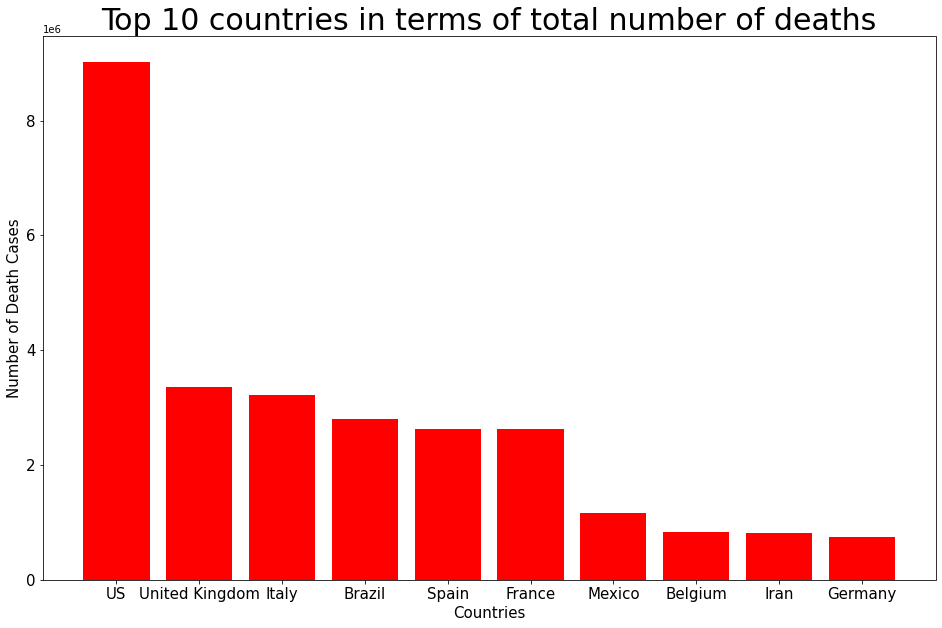

In [42]:
#Plotting barchart for top 10 countries in terms of death cases

plt.figure(figsize=(16, 10))
plt.bar(Countries2, top_deaths.Deaths, color='Red')
plt.title('Top 10 countries in terms of total number of deaths', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Death Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

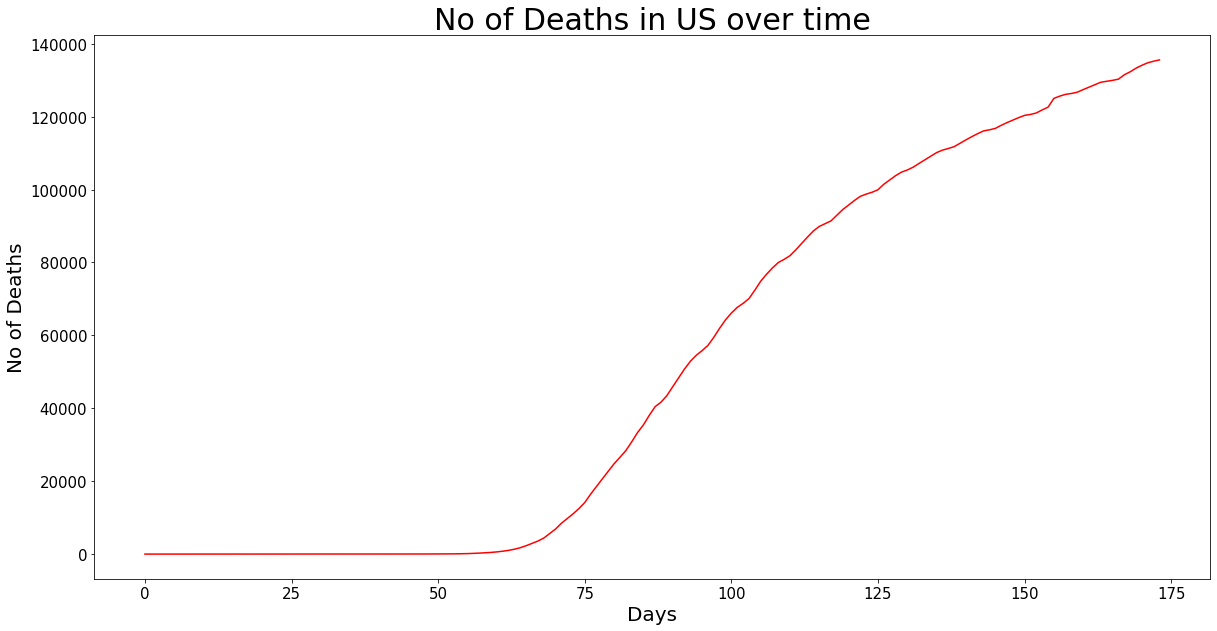

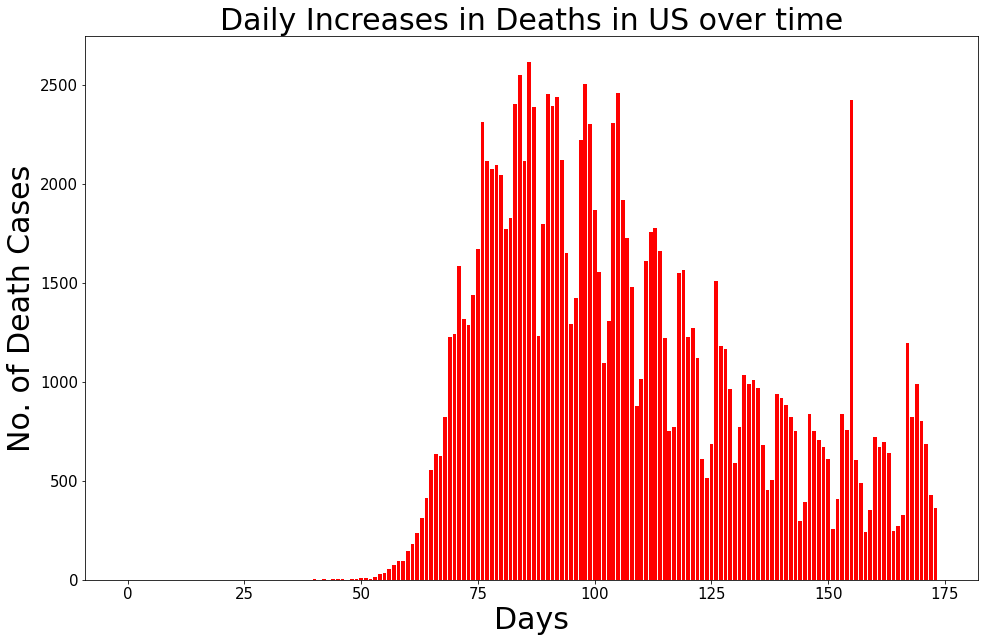

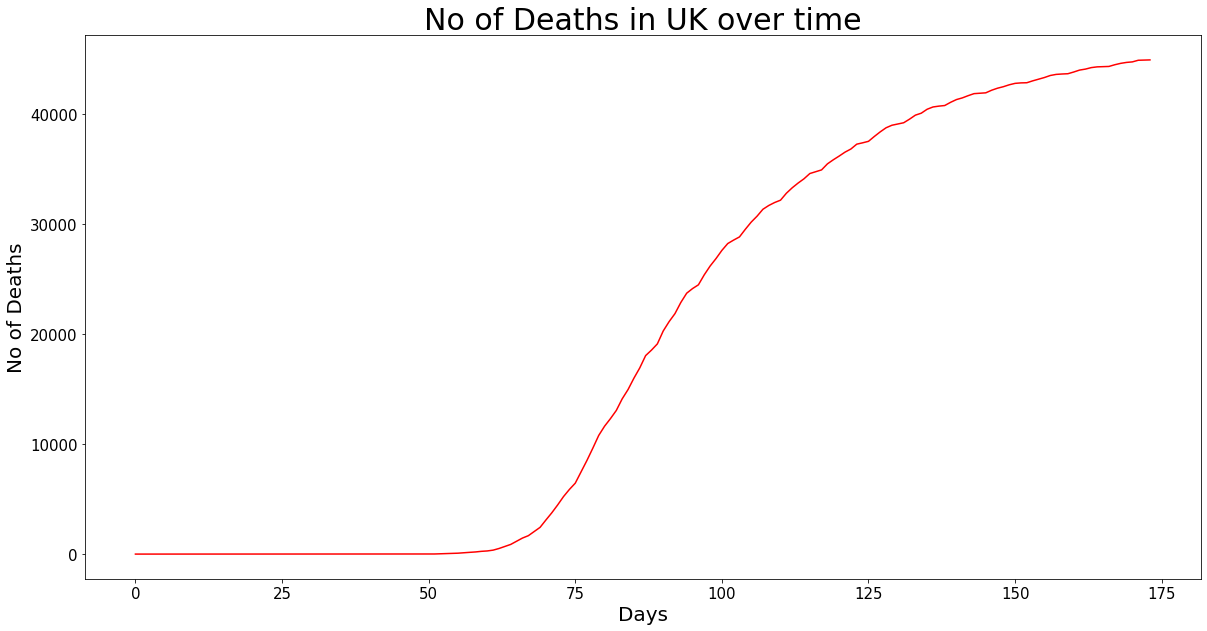

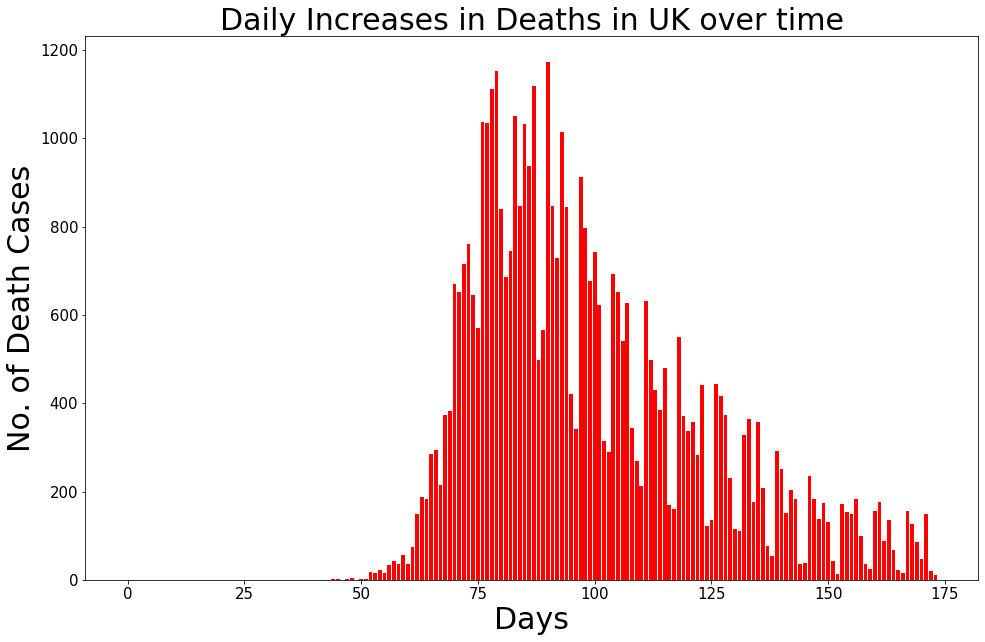

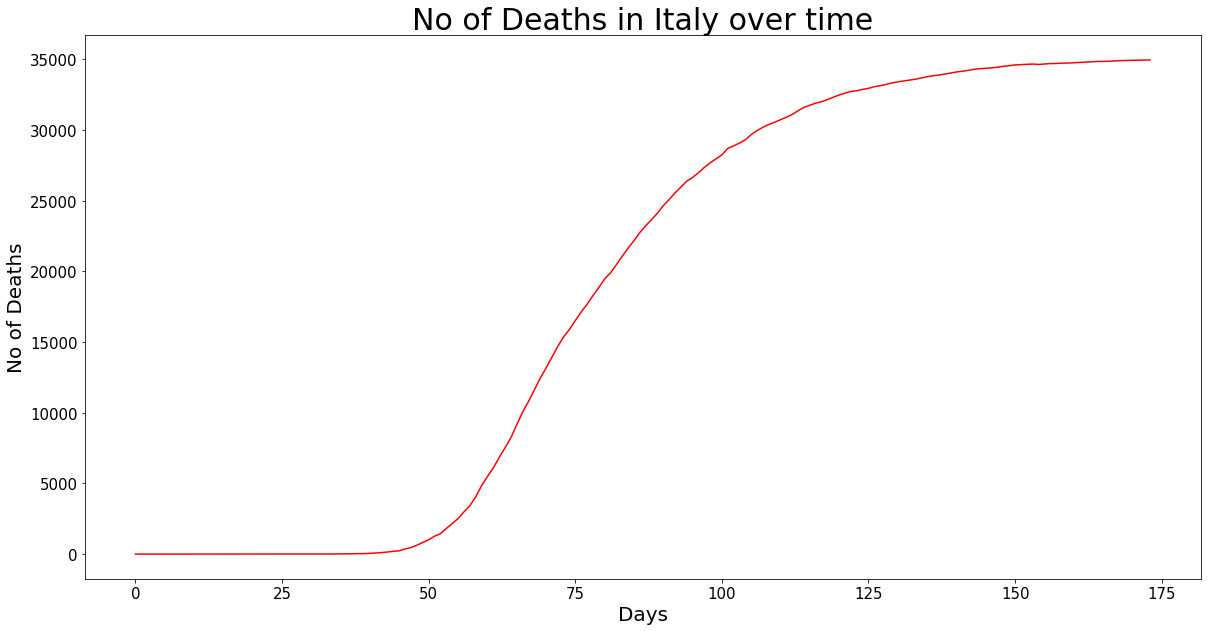

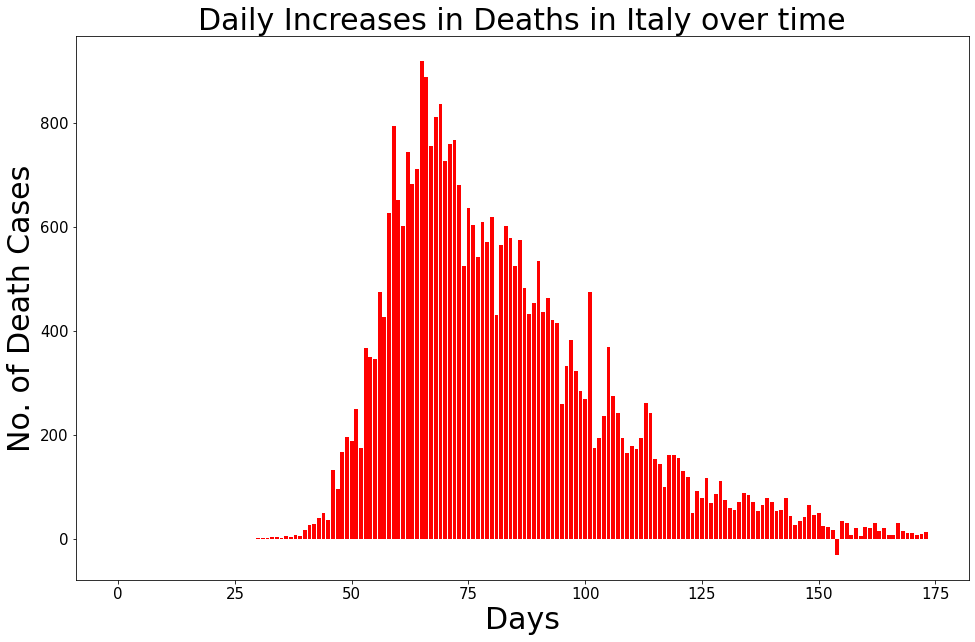

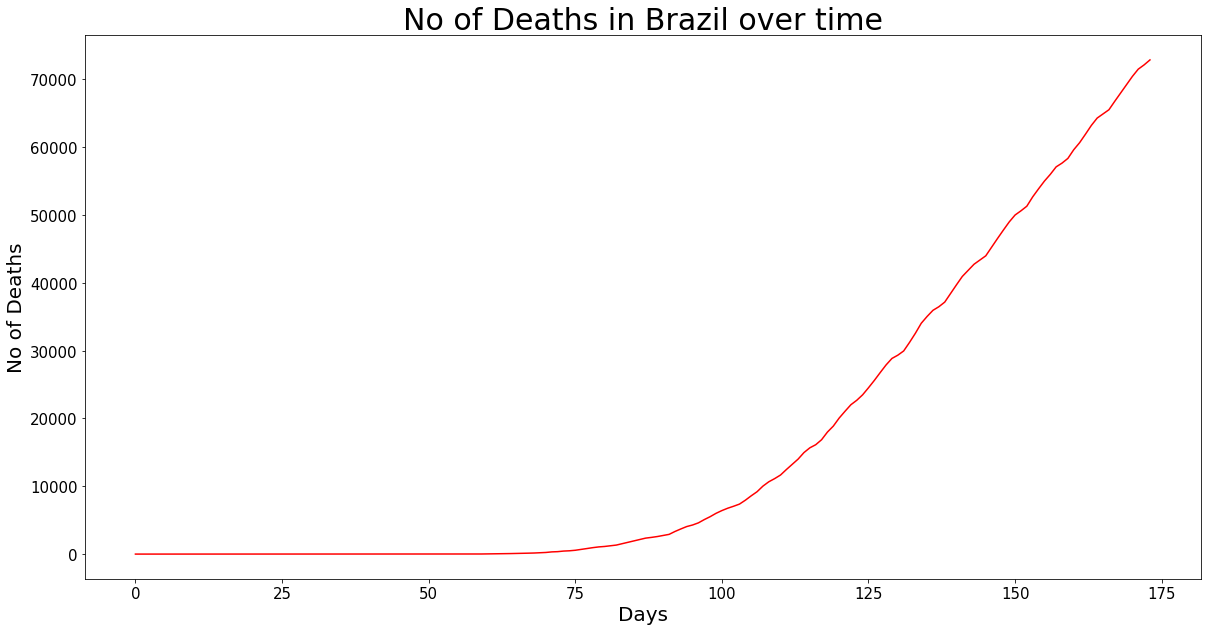

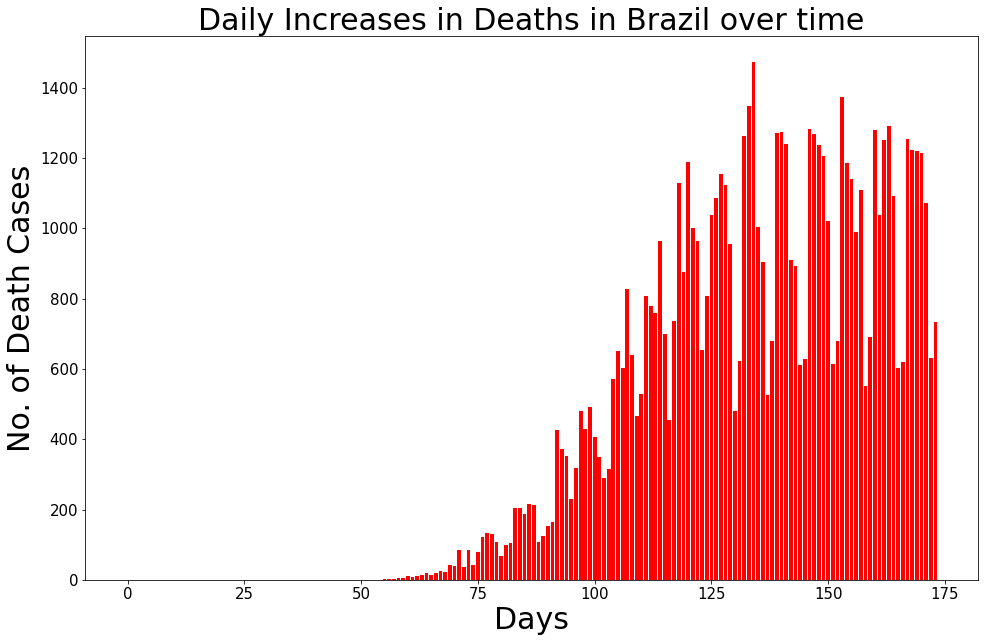

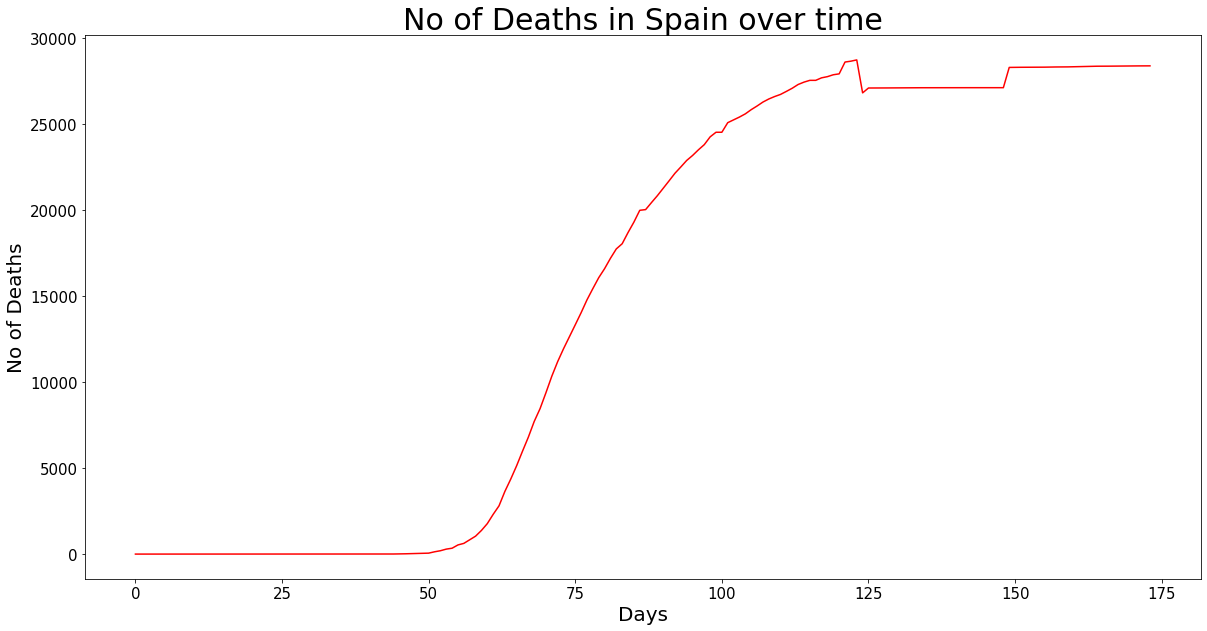

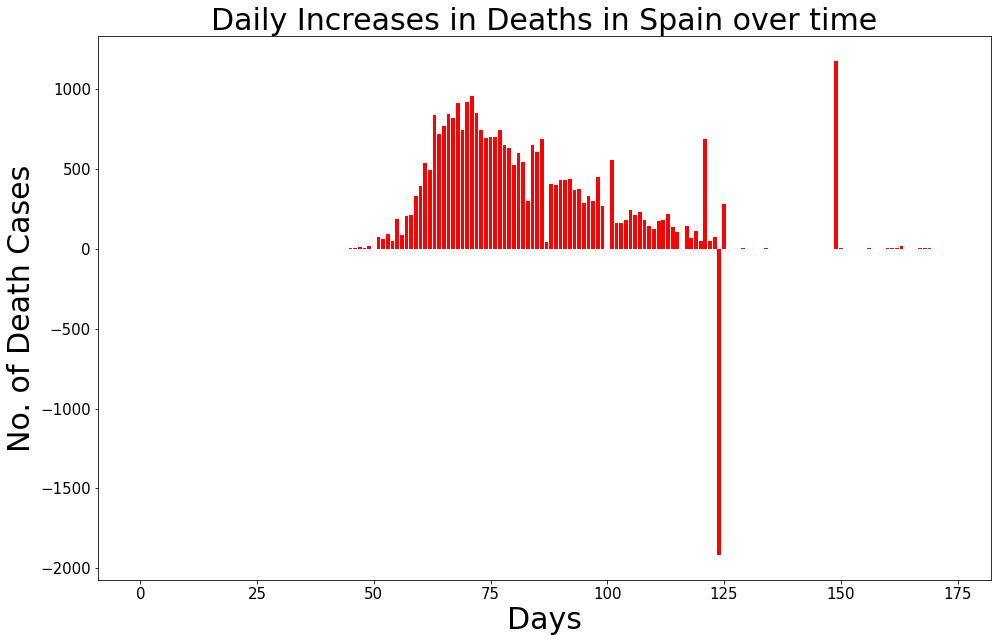

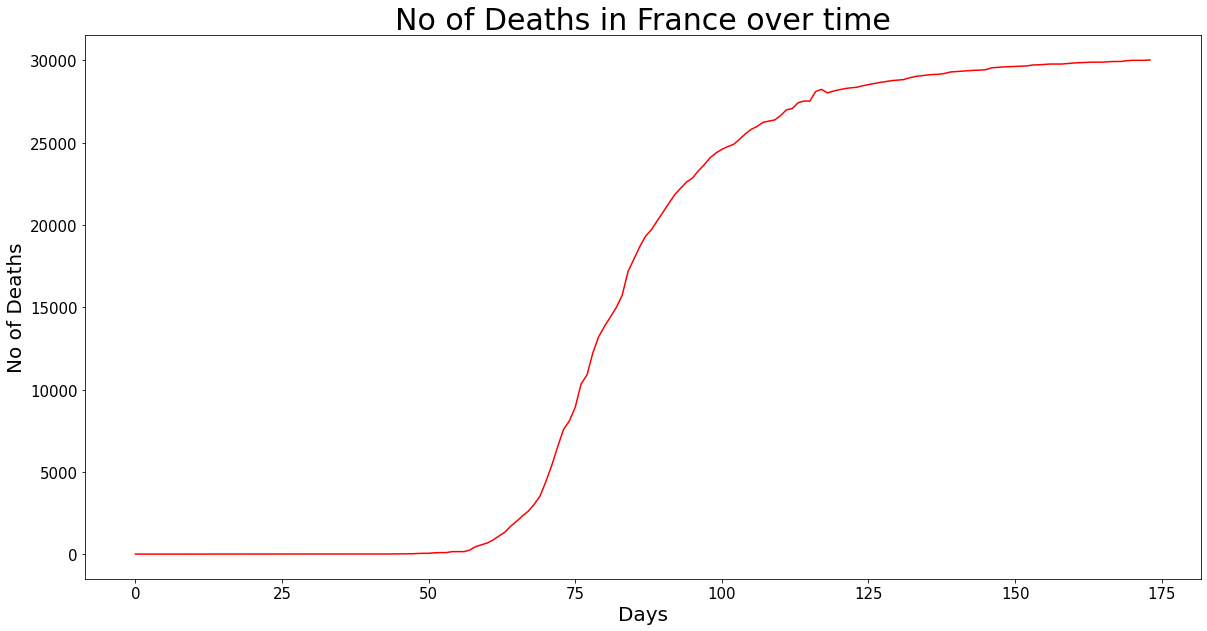

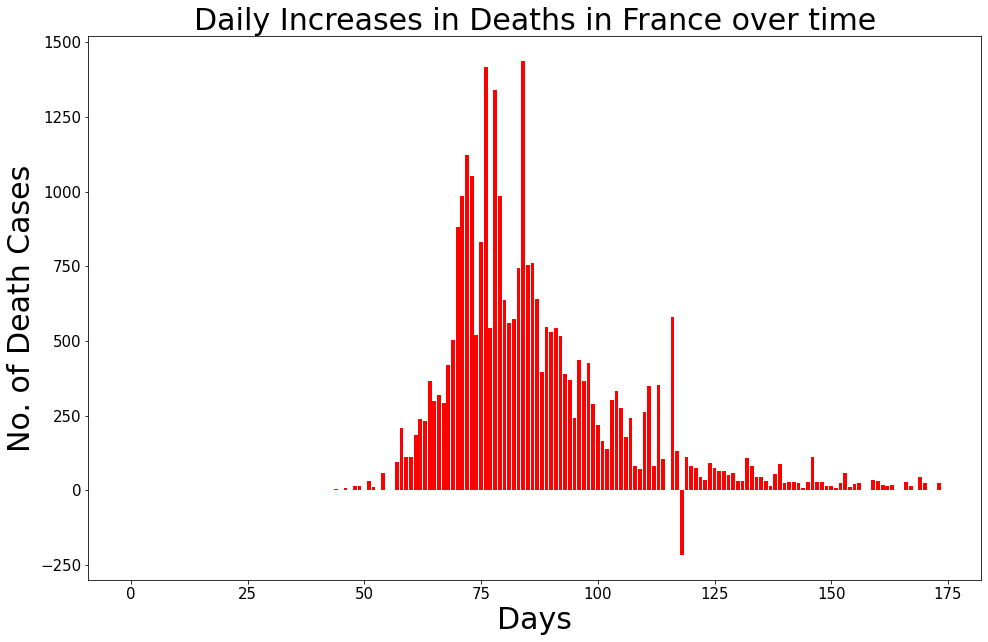

In [43]:
#US death graphs

plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, us_deaths, color= 'red')
plt.title('No of Deaths in US over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Deaths', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, us_daily_death_increase, color='red')
plt.title('Daily Increases in Deaths in US over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Death Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# UK deaths graphs
plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, uk_deaths, color= 'red')
plt.title('No of Deaths in UK over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Deaths', size=20)
plt.xticks(size=15)
plt.yticks(size=15)


plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, uk_daily_death_increase, color='red')
plt.title('Daily Increases in Deaths in UK over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Death Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Italy death graphs

plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, italy_deaths, color= 'red')
plt.title('No of Deaths in Italy over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Deaths', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, italy_daily_death_increase, color='red')
plt.title('Daily Increases in Deaths in Italy over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Death Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Brazil death graphs

plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, brazil_deaths, color= 'red')
plt.title('No of Deaths in Brazil over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Deaths', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, brazil_daily_death_increase, color='red')
plt.title('Daily Increases in Deaths in Brazil over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Death Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Spain death graphs
plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, spain_deaths, color= 'red')
plt.title('No of Deaths in Spain over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Deaths', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, spain_daily_death_increase, color='red')
plt.title('Daily Increases in Deaths in Spain over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Death Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Spain deaths

plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, france_deaths, color= 'red')
plt.title('No of Deaths in France over time', size=30)
#ax.ticklabel_format(useOffset=False)
plt.xlabel('Days', size=20)
plt.ylabel('No of Deaths', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, france_daily_death_increase, color='red')
plt.title('Daily Increases in Deaths in France over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Death Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# The next graph is basically a graphical comparison of the top countries with most number of death cases due to corona virus


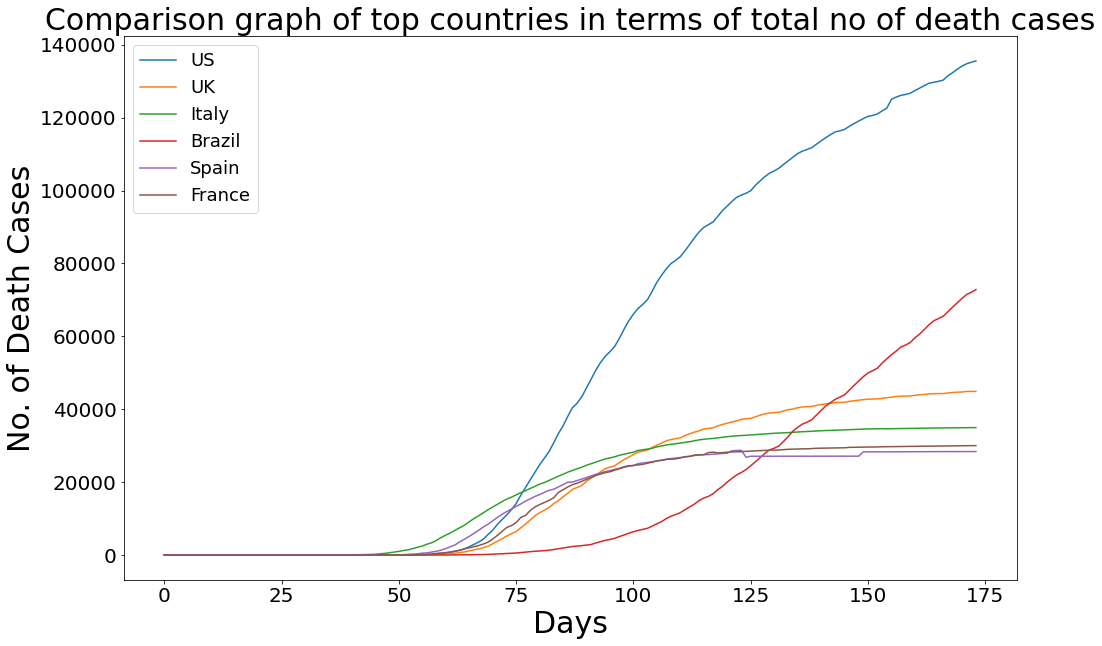

In [44]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, uk_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, brazil_deaths)
plt.plot(adjusted_dates, spain_deaths)
plt.plot(adjusted_dates, france_deaths)

plt.title('Comparison graph of top countries in terms of total no of death cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Death Cases', size=30)
plt.legend(['US', 'UK', 'Italy', 'Brazil', 'Spain', 'France'], prop={'size': 18})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [45]:
pivoted_recovered= pd.read_csv('pivoted_recovered.csv')

In [46]:
df_recovered= pivoted_recovered.groupby('Country').agg({'Recoveries':'sum'})
df_recovered

sorted_df_recovered= df_recovered.sort_values('Recoveries', ascending= False)
sorted_df_recovered

top_recovered= sorted_df_recovered.head(10)
top_recovered
Countries3= list(top_recovered.index)

# Next we will plot the top 10 countries with most number of Recoveries. And will see the increasing trend of recoveries over time and daily increase for the top 6 countries with most number of recoveries.

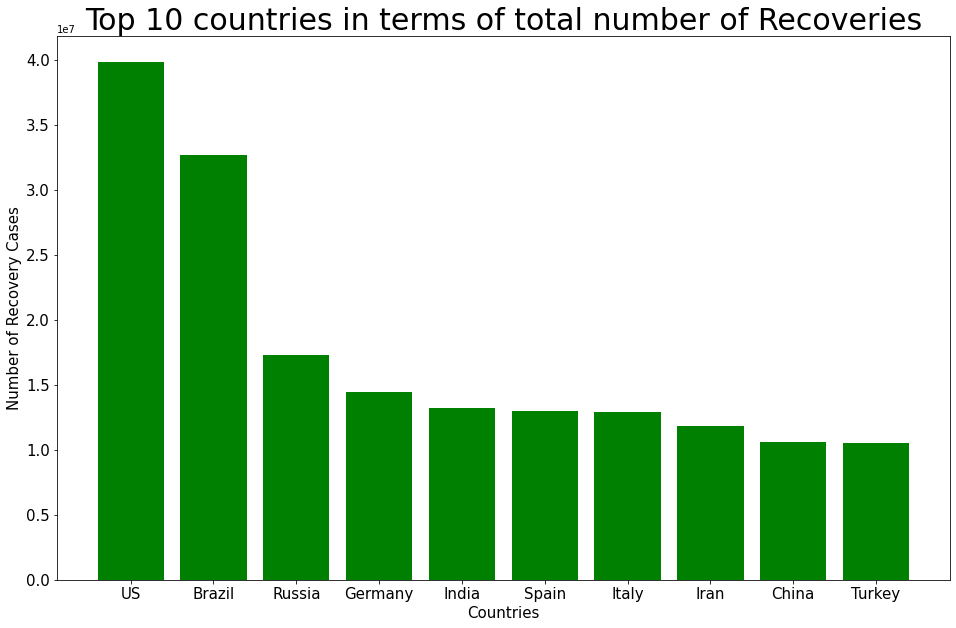

In [47]:
#Plotting barchart for the top 10 countries for best recoveries

plt.figure(figsize=(16, 10))
plt.bar(Countries3, top_recovered.Recoveries, color='Green')
plt.title('Top 10 countries in terms of total number of Recoveries', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

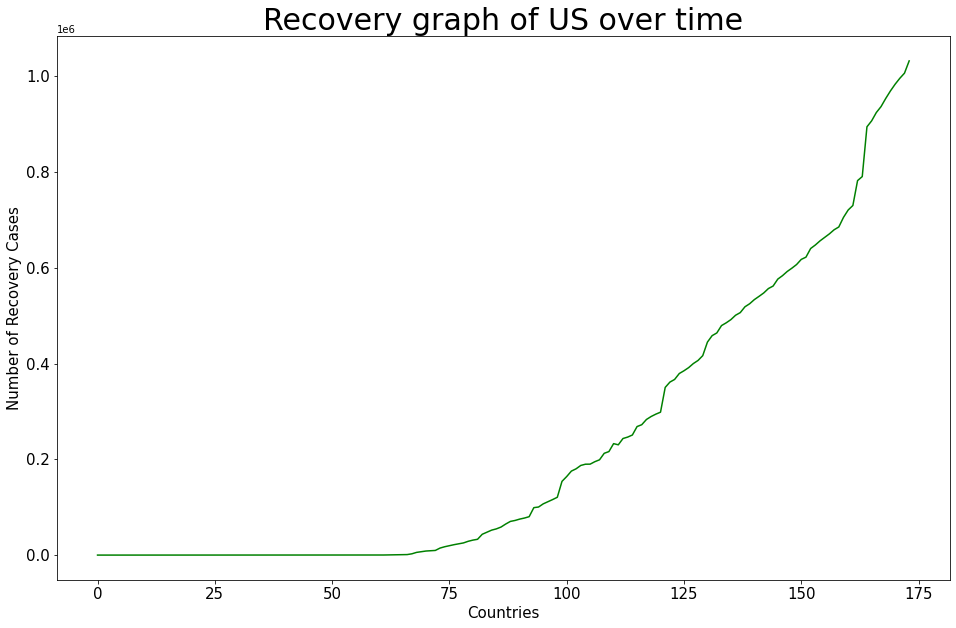

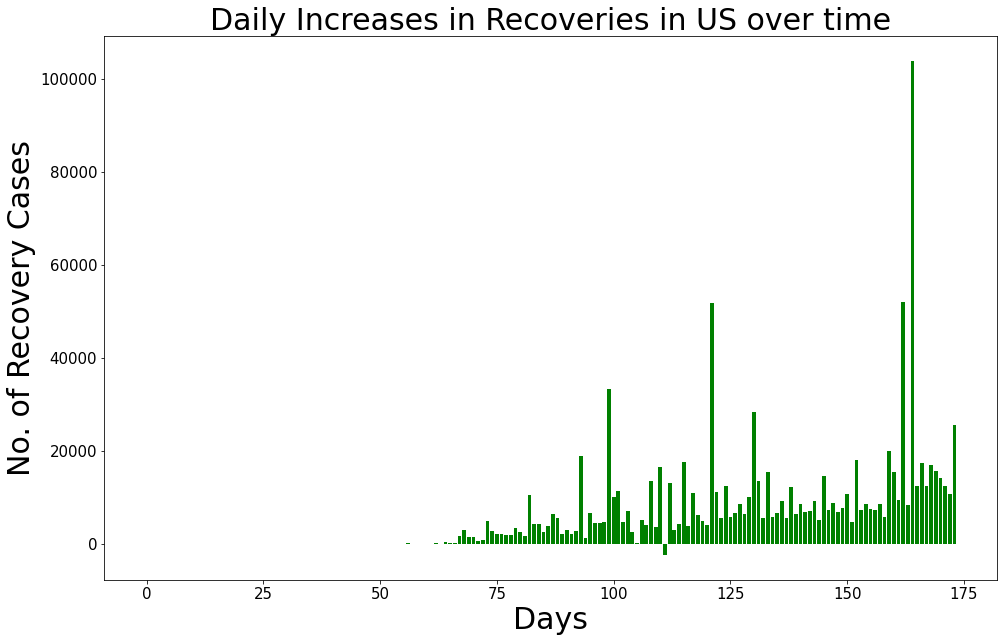

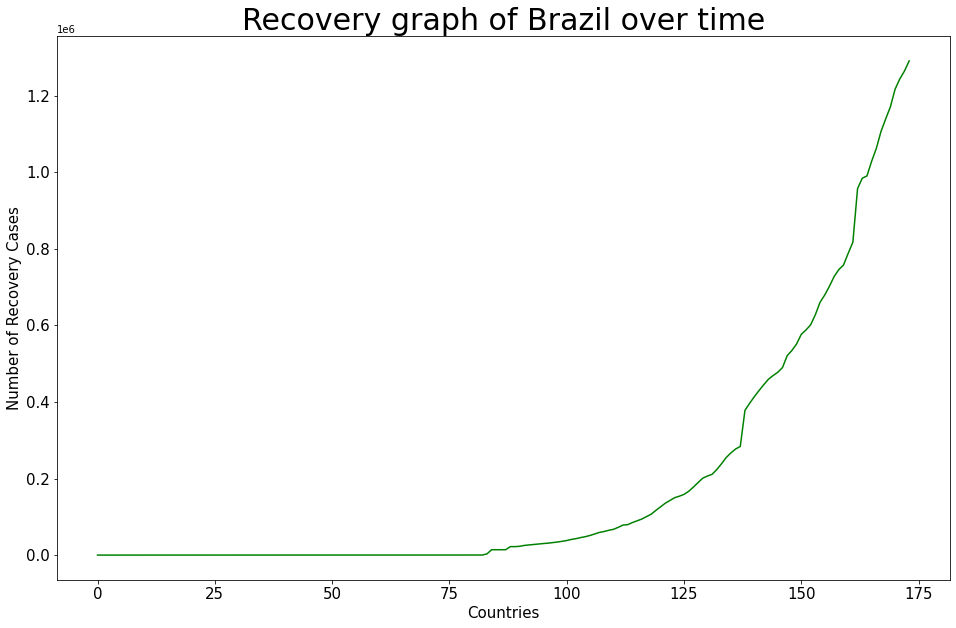

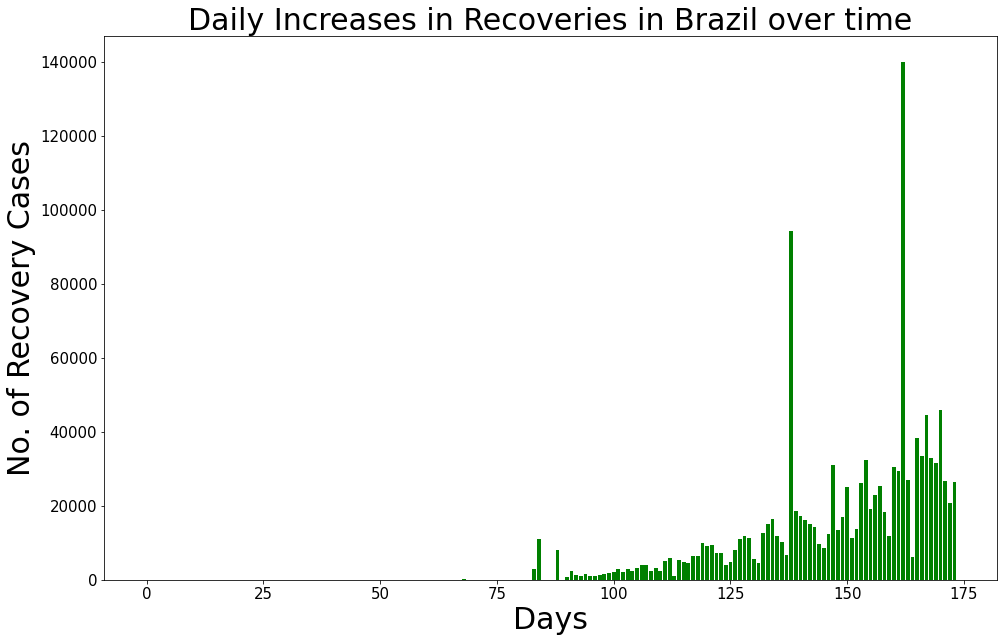

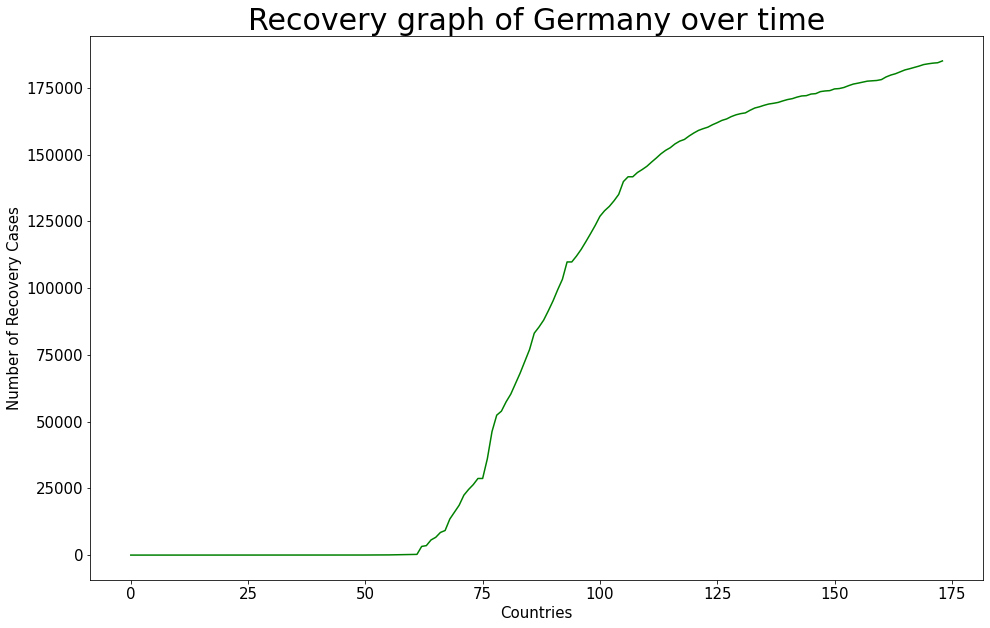

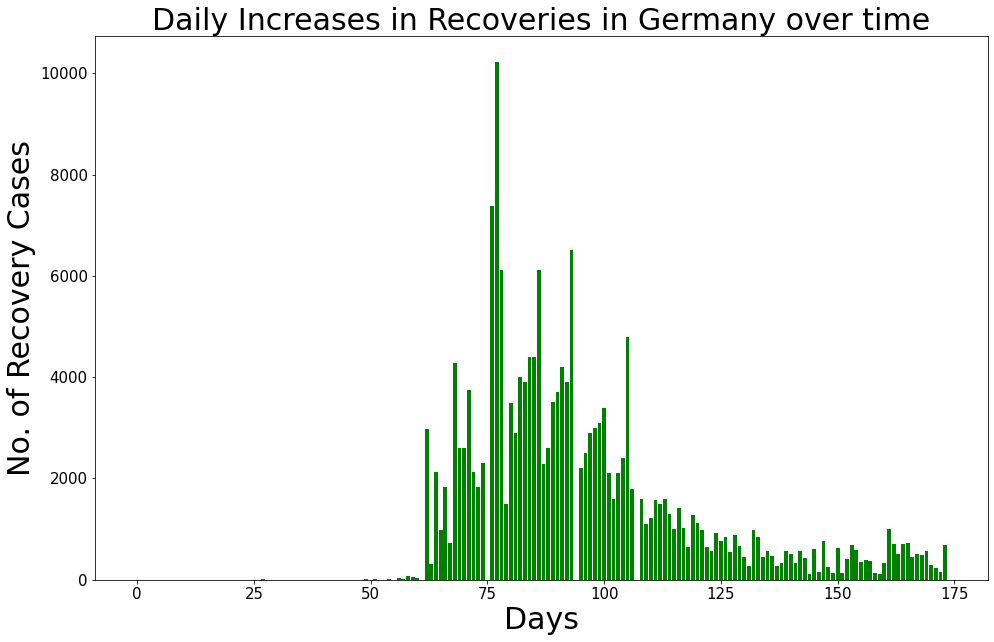

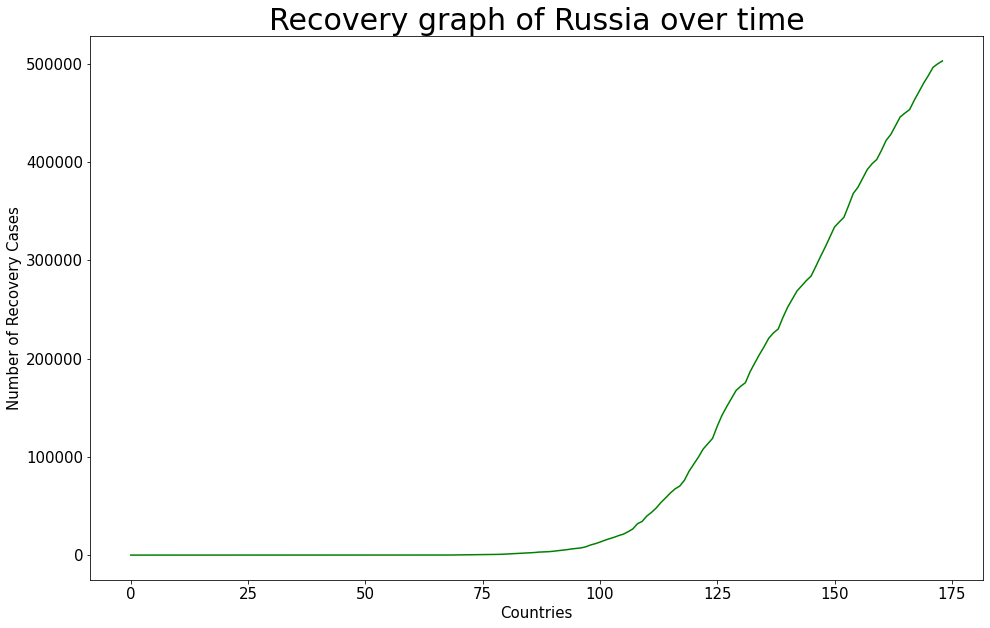

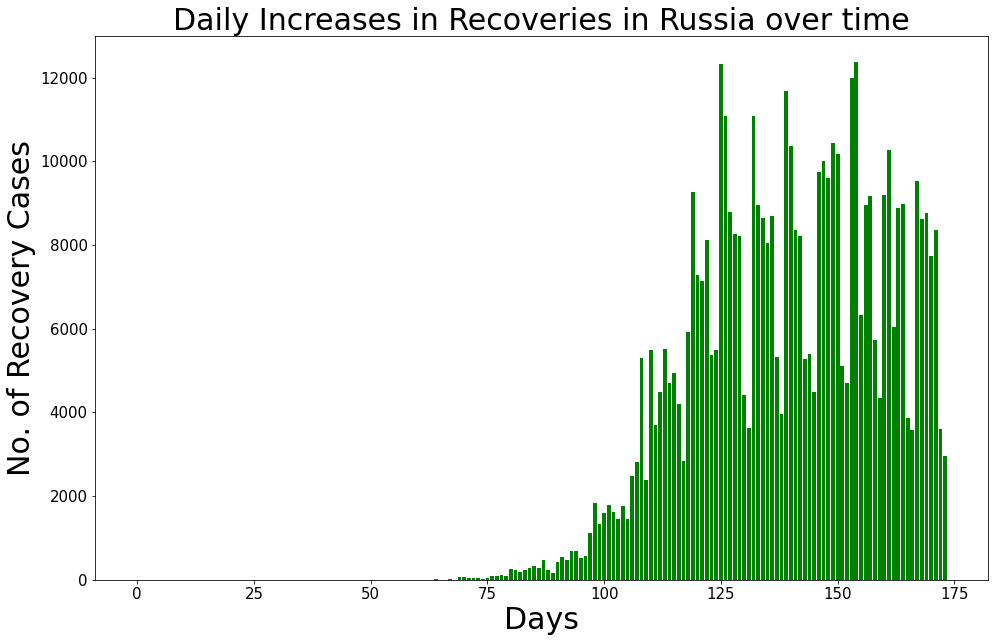

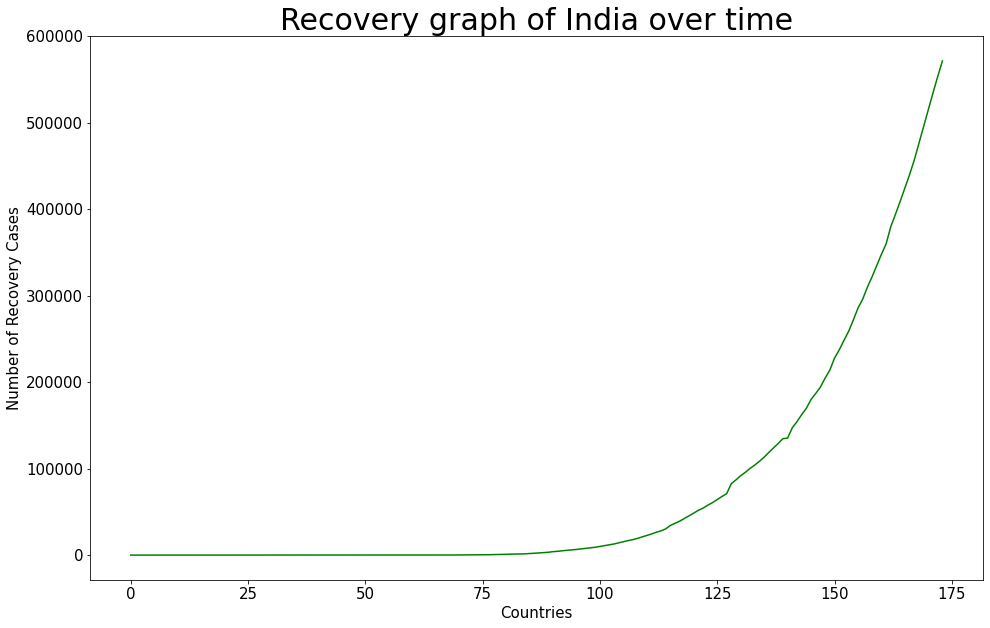

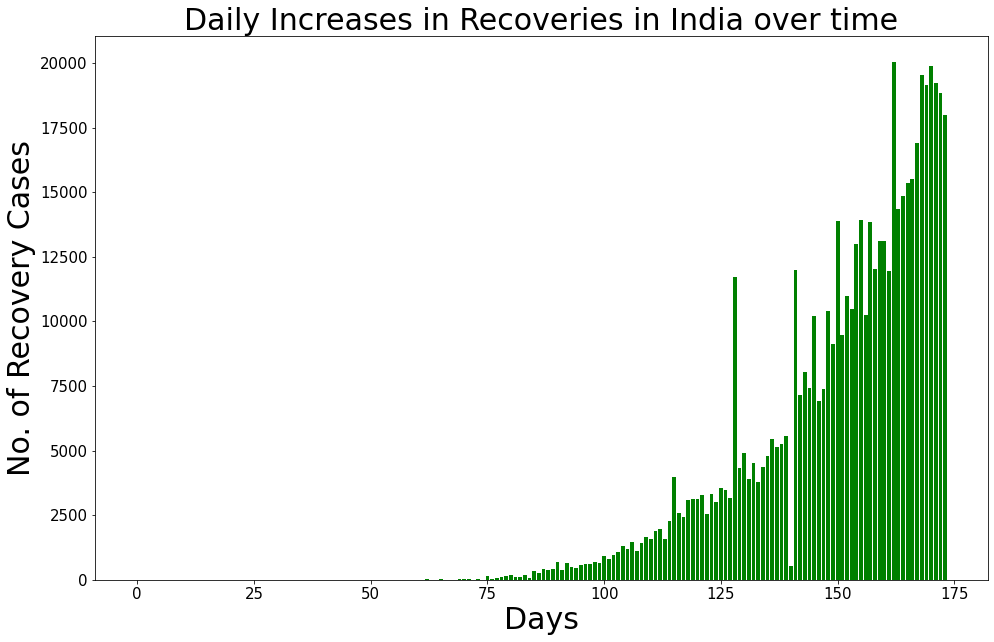

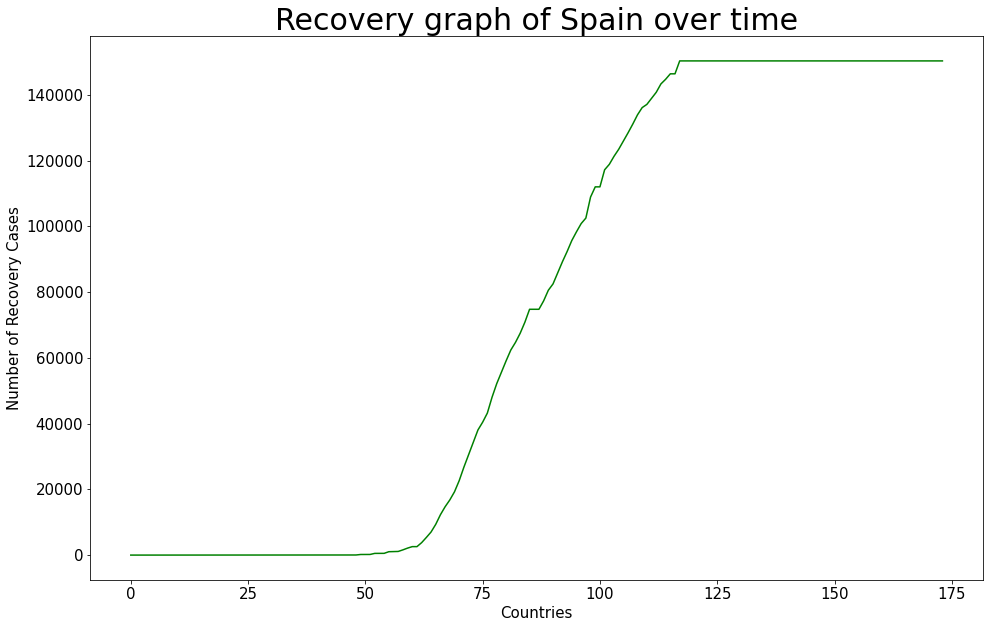

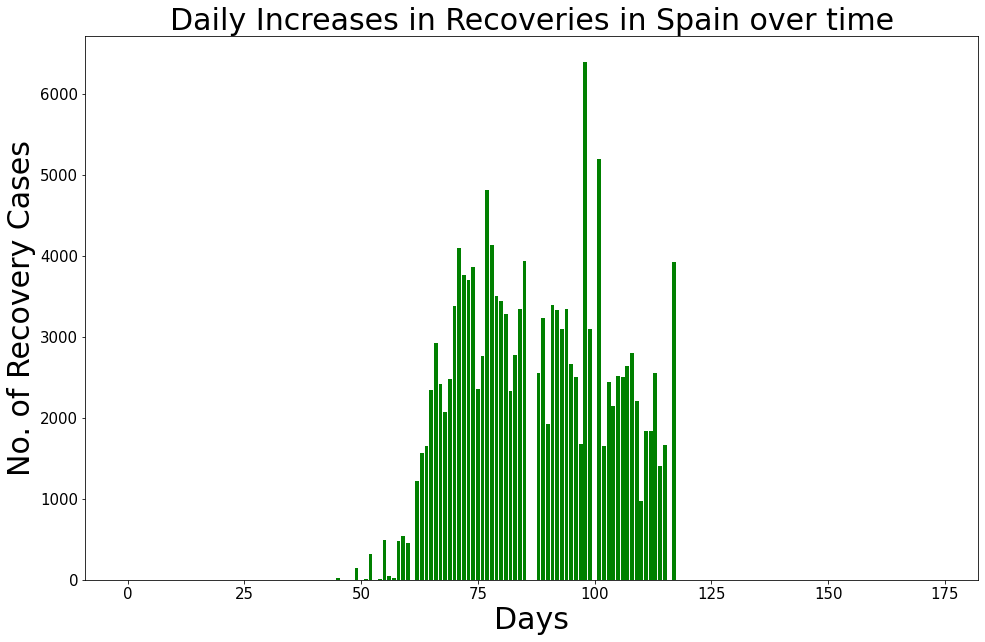

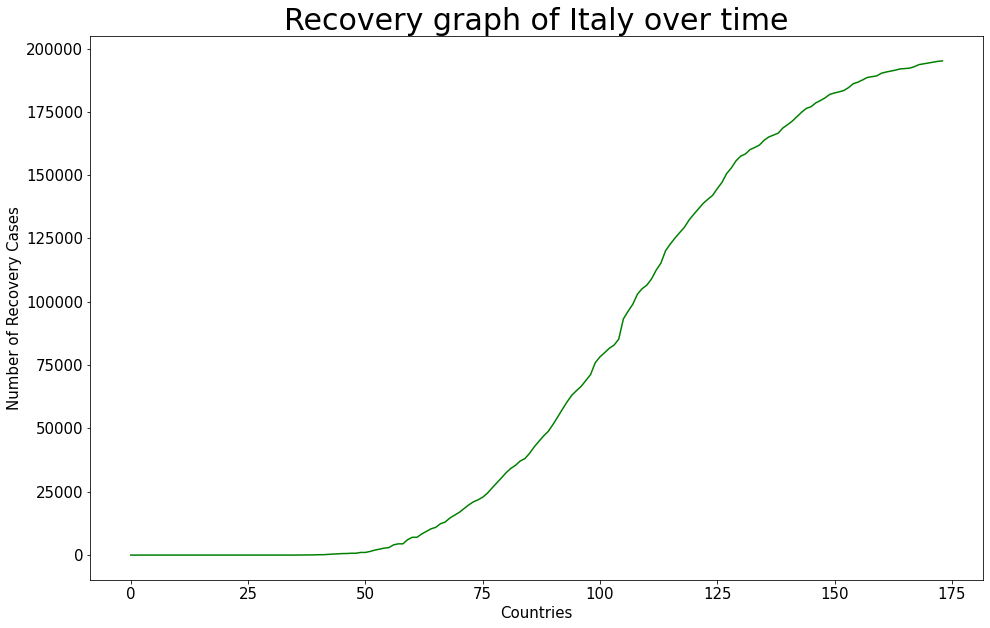

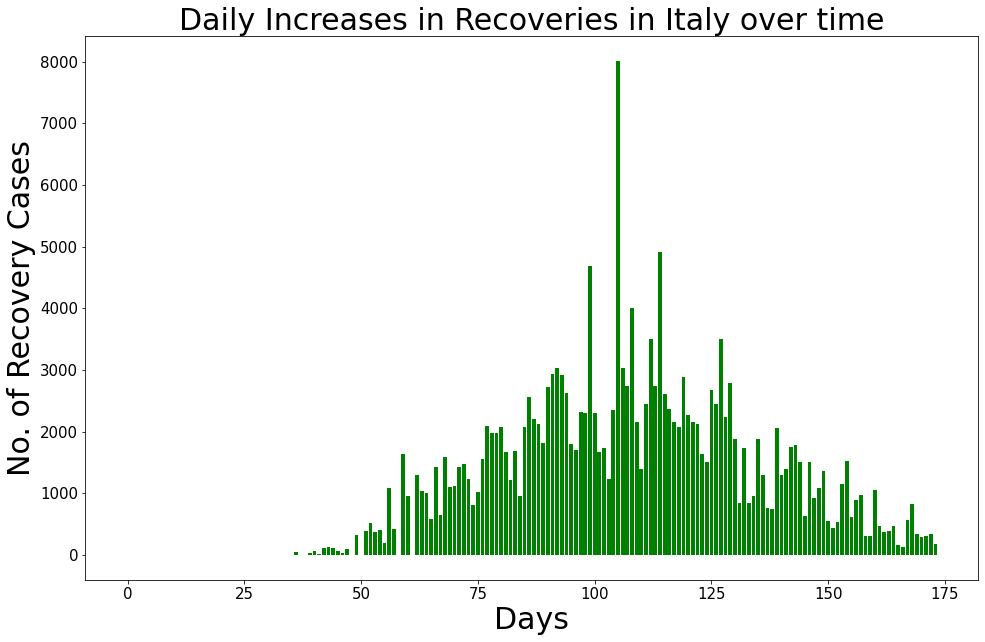

In [48]:
#US recovery graphs

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, us_recoveries, color='Green')
plt.title('Recovery graph of US over time', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, us_daily_recovery_increase, color='green')
plt.title('Daily Increases in Recoveries in US over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Brazil recovery graphs

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, brazil_recoveries, color='Green')
plt.title('Recovery graph of Brazil over time', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, brazil_daily_recovery_increase, color='green')
plt.title('Daily Increases in Recoveries in Brazil over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Germany recovery graphs

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, germany_recoveries, color='Green')
plt.title('Recovery graph of Germany over time', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, germany_daily_recovery_increase, color='green')
plt.title('Daily Increases in Recoveries in Germany over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#Russia recovery graphs

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, russia_recoveries, color='Green')
plt.title('Recovery graph of Russia over time', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, russia_daily_recovery_increase, color='green')
plt.title('Daily Increases in Recoveries in Russia over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#India recovery graphs

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, india_recoveries, color='Green')
plt.title('Recovery graph of India over time', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, india_daily_recovery_increase, color='green')
plt.title('Daily Increases in Recoveries in India over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


#Spain recovery graphs

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, spain_recoveries, color='Green')
plt.title('Recovery graph of Spain over time', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, spain_daily_recovery_increase, color='green')
plt.title('Daily Increases in Recoveries in Spain over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


#Italy recovery graphs

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, italy_recoveries, color='Green')
plt.title('Recovery graph of Italy over time', size=30)
plt.xlabel('Countries', size=15)
plt.ylabel('Number of Recovery Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, italy_daily_recovery_increase, color='green')
plt.title('Daily Increases in Recoveries in Italy over time', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Comparison between top 6 countries with most number of recovery is done in the following chart.

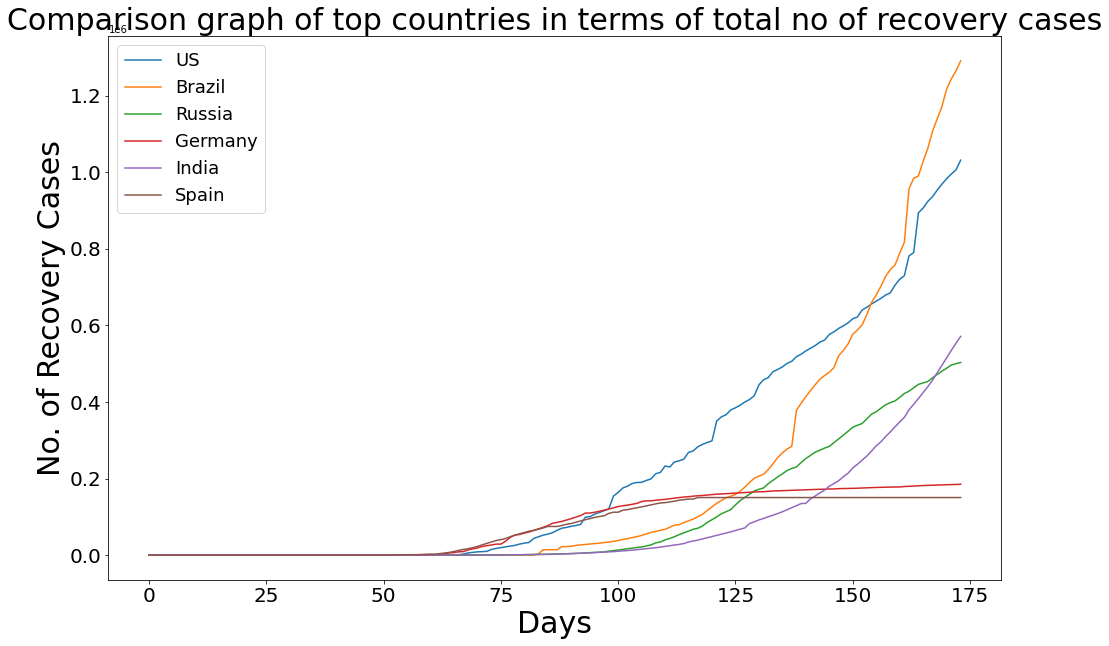

In [49]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, brazil_recoveries)
plt.plot(adjusted_dates, russia_recoveries)
plt.plot(adjusted_dates, germany_recoveries)
plt.plot(adjusted_dates, india_recoveries)
plt.plot(adjusted_dates, spain_recoveries)

plt.title('Comparison graph of top countries in terms of total no of recovery cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('No. of Recovery Cases', size=30)
plt.legend(['US', 'Brazil', 'Russia', 'Germany', 'India', 'Spain'], prop={'size': 18})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Prediction of worldwide confirmed and death cases due to corona virus and plotting the predicted values against the original ones.

## First we will predict the confirmed covid-19 cases globally using polynomial regression of degree 4 and plot the predicted values against the original values.

In [50]:
x_train, x_test, y_train, y_test= train_test_split(total_days[50:], global_cases[50:], test_size=0.10, shuffle=False)

In [51]:
highest_degree= PolynomialFeatures(degree=4)
poly_x_train= highest_degree.fit_transform(x_train)
poly_x_test= highest_degree.fit_transform(x_test)
reg_future_forcast = highest_degree.fit_transform(future_forcast)

In [52]:
#Fitting the model

lm1= LinearRegression(normalize=True, fit_intercept=False)
lm1.fit(poly_x_train, y_train)
test_predict= lm1.predict(poly_x_test)
linear_pred = lm1.predict(reg_future_forcast)
print('Mean Absolute Error:', mean_absolute_error(test_predict, y_test))
print('Mean Squared Error:',mean_squared_error(test_predict, y_test))

Mean Absolute Error: 260360.32995865608
Mean Squared Error: 89114457332.6419


In [53]:
len(linear_pred)

184

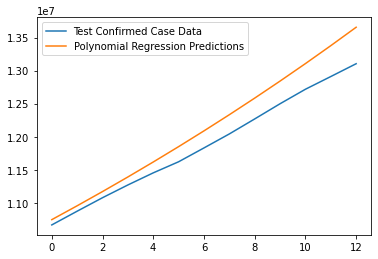

In [54]:
plt.plot(y_test)
plt.plot(test_predict)
plt.legend(['Test Confirmed Case Data', 'Polynomial Regression Predictions'])

In [92]:
def predict_plot(x, y, prediction, algorithm, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, prediction, linestyle='dashed', color=color)
    plt.title('Covid-19 death cases prediction using polynomial regression', size=30)
    plt.xlabel('Days', size=30)
    plt.ylabel('No. of Cases', size=30)
    plt.legend(['Original values', 'Polynomial Regression Prediction Values'], prop={'size': 15})
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

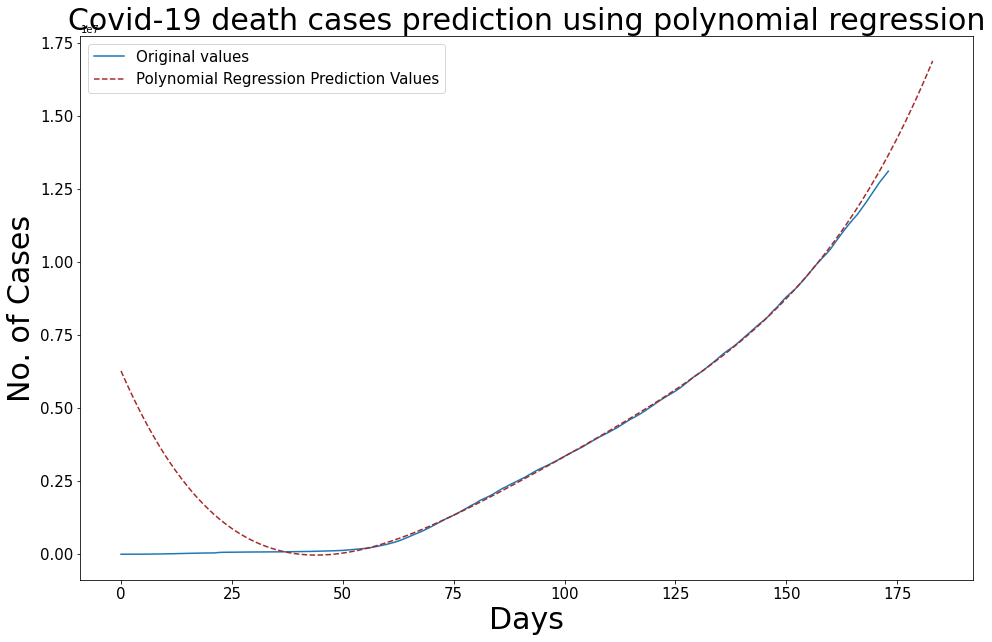

In [94]:
predict_plot(adjusted_dates, global_cases,linear_pred ,'Polynomial Regression', 'brown')

## Now predicting the deaths due to covid-19 globally using polynomial regression of highest degree 5 and plotting the predicted values againt the original values.

In [87]:
x_train1, x_test1, y_train1, y_test1= train_test_split(total_days[50:], total_deaths[50:], test_size=0.10, shuffle=False)

In [88]:
highest_degree1= PolynomialFeatures(degree=5)
poly_x_train1= highest_degree1.fit_transform(x_train1)
poly_x_test1= highest_degree1.fit_transform(x_test1)
reg_future_forcast = highest_degree1.fit_transform(future_forcast)

In [89]:
lm2= LinearRegression(normalize=True,fit_intercept=False)
lm2.fit(poly_x_train1, y_train1)
test_predict1= lm2.predict(poly_x_test1)
linear_pred1 = lm2.predict(reg_future_forcast)
print('Mean Absolute Error:', mean_absolute_error(test_predict1, y_test1))
print('Mean Squared Error:',mean_squared_error(test_predict1, y_test1))

Mean Absolute Error: 3011.3595069222724
Mean Squared Error: 10291592.178003537


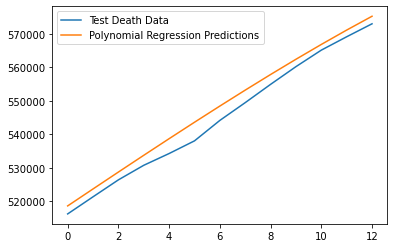

In [90]:
plt.plot(y_test1)
plt.plot(test_predict1)
plt.legend(['Test Death Data', 'Polynomial Regression Predictions'])

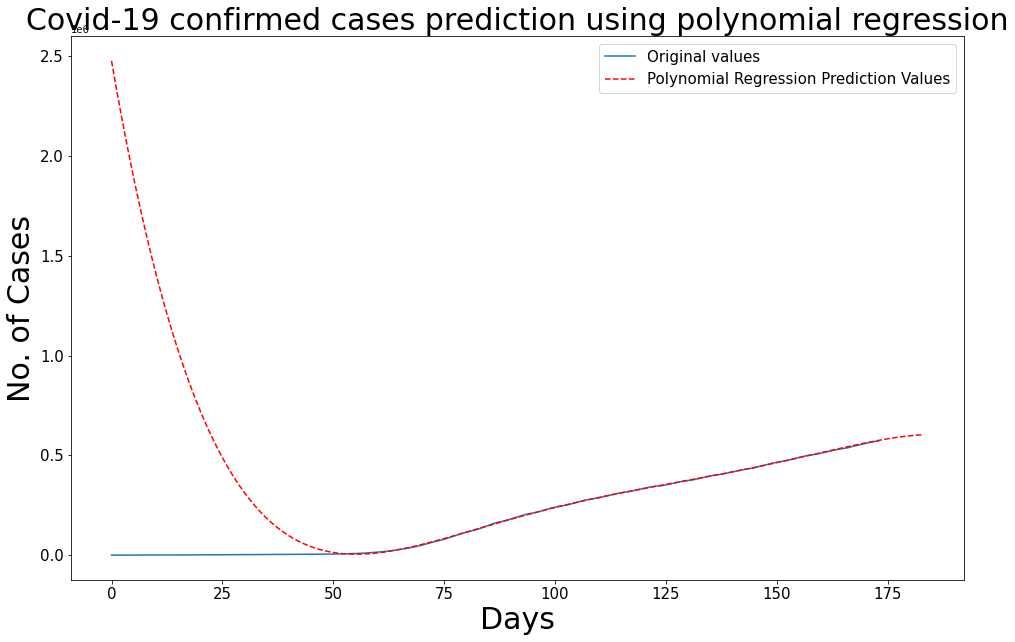

In [91]:
predict_plot(adjusted_dates, total_deaths,linear_pred1 ,'Polynomial Regression', 'red')